In [638]:
import datetime as dt
from datetime import datetime

import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [88]:
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

# Data Preparation

In [391]:
covid_df = pd.read_csv(r'/data/users/ahiremat/ML Project/COVID Data/rows_1.csv')
covid_df.reset_index()
covid_df = covid_df.set_index("submission_date")
covid_df = covid_df.groupby(['submission_date']).sum()
covid_df = covid_df[["tot_cases", "new_case", "tot_death", "new_death"]].reset_index()
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.set_index("submission_date")
covid_df.loc[covid_df["new_case"]<10000]

,tot_cases,new_case,tot_death,new_death
submission_date,,,,
2020-01-22,1,1,0,0
2020-01-23,1,0,0,0
2020-01-24,2,1,0,0
2020-01-25,2,0,0,0
2020-01-26,5,3,0,0
2020-01-27,5,0,0,0
2020-01-28,5,0,0,0
2020-01-29,5,0,0,0
2020-01-30,5,0,0,0


In [90]:
sp_df = pd.read_csv(r'/data/users/ahiremat/ML Project/Stock Data/GSPC.csv')
sp_df["Date"] = pd.to_datetime(sp_df["Date"])
sp_df = sp_df.set_index("Date")

In [373]:
index = pd.date_range("2020-01-22","2020-12-13")
sp_df = sp_df.reindex(index)
sp_df = sp_df.fillna(method='pad')
#sp_df.loc["2020-03-15":"2020-04-15"]

,Open,High,Low,Close,Adj Close,Volume
2020-03-15,2569.989990,2711.330078,2492.370117,2711.020020,2711.020020,8.258670e+09
2020-03-16,2508.590088,2562.979980,2380.939941,2386.129883,2386.129883,7.781540e+09
2020-03-17,2425.659912,2553.929932,2367.040039,2529.189941,2529.189941,8.358500e+09
2020-03-18,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8.755780e+09
2020-03-19,2393.479980,2466.969971,2319.780029,2409.389893,2409.389893,7.946710e+09
2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-21,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-22,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9.044690e+09
2020-03-23,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7.402180e+09
2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7.547350e+09


In [1577]:
merged_df = covid_df.merge(sp_df, left_index = True, right_index = True )
merged_df = merged_df.drop(columns = ["Volume"])
merged_df.loc[merged_df["new_case"]== 0]

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close,Adj Close
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883
2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990
2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902
2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912
2020-02-02,8,0,0,0,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020
2020-02-04,11,0,0,0,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088
2020-02-05,11,0,0,0,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941
2020-02-06,11,0,0,0,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029


In [300]:
lstm_df = merged_df[["Open","new_case","Close"]]
lstm_arr = lstm_df.to_numpy()
lstm_arr

array([[3.33002002e+03, 1.00000000e+00, 3.32175000e+03],
       [3.31577002e+03, 0.00000000e+00, 3.32554004e+03],
       [3.33310010e+03, 1.00000000e+00, 3.29546997e+03],
       [3.33310010e+03, 0.00000000e+00, 3.29546997e+03],
       [3.33310010e+03, 3.00000000e+00, 3.29546997e+03],
       [3.24715991e+03, 0.00000000e+00, 3.24362988e+03],
       [3.25535010e+03, 0.00000000e+00, 3.27623999e+03],
       [3.28945996e+03, 0.00000000e+00, 3.27339990e+03],
       [3.25644995e+03, 0.00000000e+00, 3.28365991e+03],
       [3.28233008e+03, 2.00000000e+00, 3.22552002e+03],
       [3.28233008e+03, 1.00000000e+00, 3.22552002e+03],
       [3.28233008e+03, 0.00000000e+00, 3.22552002e+03],
       [3.23565991e+03, 3.00000000e+00, 3.24891992e+03],
       [3.28061011e+03, 0.00000000e+00, 3.29759009e+03],
       [3.32490991e+03, 0.00000000e+00, 3.33468994e+03],
       [3.34491992e+03, 0.00000000e+00, 3.34578003e+03],
       [3.33554004e+03, 0.00000000e+00, 3.32770996e+03],
       [3.33554004e+03, 0.00000

# Split Sequences

In [301]:
x,y = list(), list()
n_steps = 5
for i in range(len(lstm_arr)):
    end_ix = i + n_steps
    if end_ix > len(lstm_arr):
        break
    seqx, seqy = lstm_arr[i:end_ix, : -1], lstm_arr[end_ix-1,-1]
    x.append(seqx)
    y.append(seqy)
x = np.array(x)
y = np.array(y)
print(x, y)



[[[3.33002002e+03 1.00000000e+00]
  [3.31577002e+03 0.00000000e+00]
  [3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]]

 [[3.31577002e+03 0.00000000e+00]
  [3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]
  [3.24715991e+03 0.00000000e+00]]

 [[3.33310010e+03 1.00000000e+00]
  [3.33310010e+03 0.00000000e+00]
  [3.33310010e+03 3.00000000e+00]
  [3.24715991e+03 0.00000000e+00]
  [3.25535010e+03 0.00000000e+00]]

 ...

 [[3.60015991e+03 1.96227000e+05]
  [3.60015991e+03 2.19187000e+05]
  [3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]]

 [[3.60015991e+03 2.19187000e+05]
  [3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]
  [3.60015991e+03 1.86215000e+05]]

 [[3.60015991e+03 2.14099000e+05]
  [3.60015991e+03 2.06992000e+05]
  [3.60015991e+03 1.74387000e+05]
  [3.60015991e+03 1.86215000e+05

# Multivariate LSTM - Predicting one value

In [302]:
n_features = x.shape[2]

#Defining Model

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

# Fit model

model.fit(x,y, epochs = 200, verbose = 0)

# Prediction demo

x_input = array([[3000, 1],[2980, 20], [2900, 100], [2850, 200], [2800, 300]])
x_input = x_input.reshape((1, n_steps, n_features))

yhat = model.predict(x_input, verbose = 0)

print(yhat)

[[2874.3557]]


# Univariate LSTM Prediction - Predicting a line

In [174]:
uni_lstm = merged_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close',
                                  'tot_cases', 'new_case', 'tot_death', 'new_death'])
uni_lstm = uni_lstm.reset_index()
close_data = uni_lstm["Close"].values
close_data = close_data.reshape((-1, 1))

split_percent = 0.8
split = int(split_percent * len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = uni_lstm["index"][:split]
date_test = uni_lstm["index"][split:]


In [175]:
#Splitting the Data into train and test test and also making it lookback the previous 5 units

look_back = 5

train_generator = TimeseriesGenerator(close_train, close_train, length= look_back, batch_size = 15)
test_generator = TimeseriesGenerator(close_test, close_test, length = look_back, batch_size = 1)

In [201]:
#Creating and training the Model

model = Sequential()

model.add(LSTM(10, activation = "relu", input_shape = (look_back,1)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

num_epochs = 100

model.fit_generator(train_generator, epochs = num_epochs, verbose = 1)


Epoch 1/100
17/17 [==============================] - 3s 170ms/step - loss: 7693462.4259
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 7483128.3472
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 7264098.0930
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 7025924.5860
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 6765175.1096
Epoch 6/100
17/17 [==============================] - 0s 15ms/step - loss: 6490049.6527
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 6195589.0303
Epoch 8/100
17/17 [==============================] - 0s 16ms/step - loss: 5878922.7319
Epoch 9/100
17/17 [==============================] - 0s 16ms/step - loss: 5539293.0544
Epoch 10/100
17/17 [==============================] - 0s 15ms/step - loss: 5184564.9053
Epoch 11/100
17/17 [==============================] - 0s 10ms/step - loss: 4818481.3637
Epoch 12/100
17/17 [=====================

In [205]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

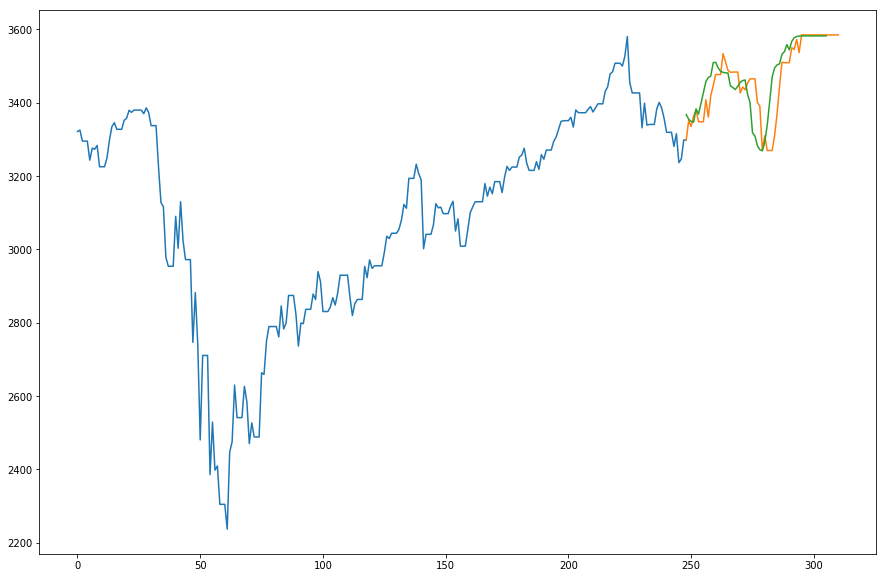

In [206]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize =(15,10))

xa = range(249)
xb = range(248, (249+62))
xc = range(248, (249+57))
ax.plot(xa, close_train, label = "Data")
ax.plot(xb, close_test, label = "Test")
ax.plot(xc, prediction, label = "Pred")

In [1575]:
merged_df

,index,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close,Adj Close
0,2020-01-22,1,1,0,0,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000
1,2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039
2,2020-01-24,2,1,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
3,2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
4,2020-01-26,5,3,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
5,2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883
6,2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990
7,2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902
8,2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912
9,2020-01-31,7,2,0,0,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020


In [1579]:
merged_df = merged_df.reset_index()
#merged_df = merged_df[['tot_cases','new_case', 'tot_death', 'new_death', 'Open', 'High', 'Low','Close']]
date_time = pd.to_datetime(merged_df.pop("index"), format='%d.%m.%Y')
date_time

df = merged_df[['new_case','new_death', 'Open','Close']]
df

,new_case,new_death,Open,Close
0,1,0,3330.020020,3321.750000
1,0,0,3315.770020,3325.540039
2,1,0,3333.100098,3295.469971
3,0,0,3333.100098,3295.469971
4,3,0,3333.100098,3295.469971
5,0,0,3247.159912,3243.629883
6,0,0,3255.350098,3276.239990
7,0,0,3289.459961,3273.399902
8,0,0,3256.449951,3283.659912
9,2,0,3282.330078,3225.520020


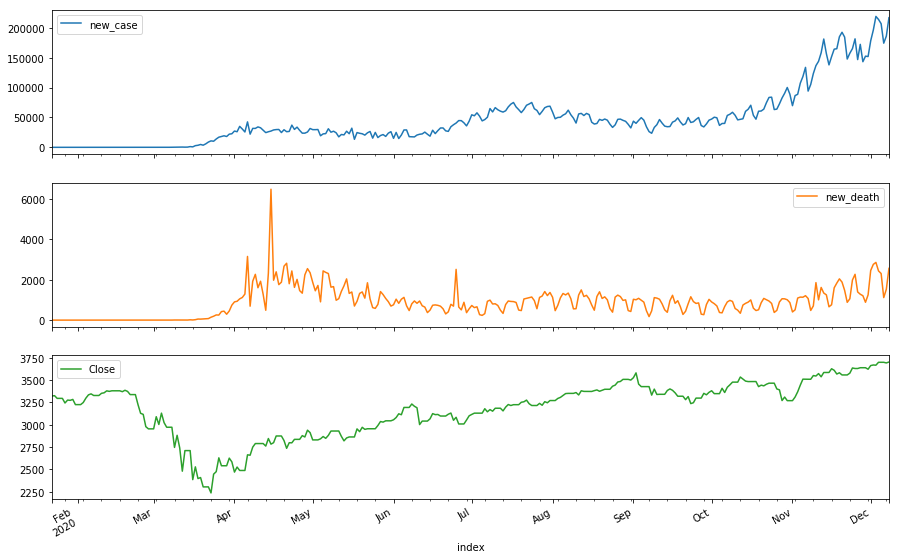

In [1583]:
plot_cols = ['new_case','new_death','Close']
plot_features = plot_cols
#plot_features.index = date_time 

#_ = plot_features.plot(subplots = True)

plot_features = merged_df[plot_cols][:322]
plot_features.index = date_time[:322]
_ = plot_features.plot(subplots = True)


In [265]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tot_cases,322.0,4.057896e+06,3.956734e+06,1.000000,532675.500000,2.652618e+06,6.757280e+06,1.504018e+07
new_case,322.0,4.670862e+04,4.689369e+04,0.000000,19914.750000,3.528100e+04,5.751800e+04,2.191870e+05
tot_death,322.0,1.210010e+05,8.898085e+04,0.000000,20805.250000,1.276615e+05,1.985770e+05,2.853510e+05
new_death,322.0,8.861832e+02,7.450916e+02,0.000000,381.750000,8.330000e+02,1.168500e+03,6.489000e+03
Open,322.0,3.177788e+03,3.058590e+02,2290.709961,2954.199951,3.255105e+03,3.383635e+03,3.600160e+03
High,322.0,3.203421e+03,2.972549e+02,2300.729980,2981.700012,3.277995e+03,3.399855e+03,3.645990e+03
Low,322.0,3.148481e+03,3.192001e+02,2191.860107,2933.590088,3.221460e+03,3.366150e+03,3.600160e+03
Close,322.0,3.179048e+03,3.091199e+02,2237.399902,2971.800109,3.250380e+03,3.385003e+03,3.626910e+03


# COVID as a Whole

## Pearson R

In [1337]:
cor_df = cor_df.dropna()
wpearson = cor_df.corr()
wpearson[["Close"]]

,Close
Open,0.989019
Close,1.000000
new_case,0.383075
Shifted by 1 Days Back,0.374199
Shifted by 2 Days Back,0.365827
Shifted by 3 Days Back,0.354596
Shifted by 4 Days Back,0.346222
Shifted by 5 Days Back,0.334780
Shifted by 6 Days Back,0.330530
Shifted by 7 Days Back,0.326937


## Coefficient of Determination (R^2)

In [1338]:
wres_df = ""
wres_df = pd.DataFrame(columns = ["RMSE", "R Squared"])
RMSE = []
r2 = []

wscaled_df = scaler.fit_transform(cor_df)
wscaled_df = pd.DataFrame(wscaled_df)
loop = wscaled_df.columns
loop = loop.drop(loop[[0,1,2]])

for i in loop:
    target = 1
    predictors = [2, i]
    
    x = wscaled_df[predictors].values
    y = wscaled_df[target].values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 30, shuffle = True)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_test_lr = lr.predict(x_test)
    
    RMSE.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
    r2.append(r2_score(y_test, pred_test_lr))

wres_df["RMSE"] = RMSE
wres_df["R Squared"] = r2

wres_df


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,RMSE,R Squared
0,0.205401,0.172186
1,0.205566,0.170856
2,0.206026,0.167140
3,0.205145,0.174250
4,0.204211,0.181748
5,0.202668,0.194066
6,0.203672,0.186065
7,0.202744,0.193466
8,0.204119,0.182482
9,0.204723,0.177637


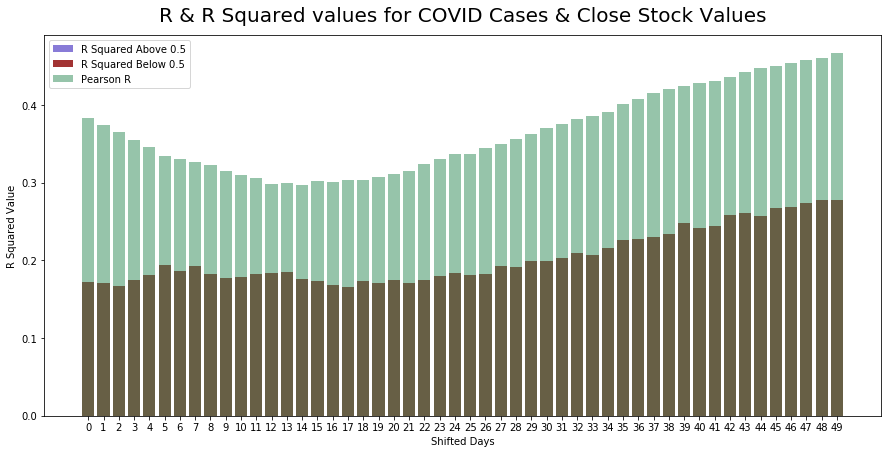

In [1342]:
threshold = 0.5
r2 = wres_df["R Squared"]

r = wpearson["Close"]

#r = r.reset_index()
#r = r.drop(columns =['index'])
r = r.drop(labels = ['Open','Close','Shifted by 50 Days Back'])
#r_cases = correlation_df["COVID Cases"]
#r_cases = r_cases.drop(labels=['Exits', 'Average Entries', 'COVID Cases', 'COVID Deaths'])

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize=(15,7))

s = list(range(0, 50))

above_threshold = np.maximum(r2, threshold)
above_threshold = above_threshold.replace( threshold, 0)
below_threshold = np.minimum(r2, threshold)
below_threshold = below_threshold.replace( threshold, 0)

ax.bar(s,above_threshold, alpha = 0.8, color = "slateblue", label = "R Squared Above 0.5")
ax.bar(s,below_threshold, alpha = 0.8, color = "darkred", label = "R Squared Below 0.5")
ax.bar(s, r, alpha = 0.5, color = "seagreen", label = "Pearson R")

#ax.plot([0,50],[threshold,threshold], "k--" )


plt.title("R & R Squared values for COVID Cases & Close Stock Values", y = 1.02, fontsize = 20)
plt.xlabel("Shifted Days", y = 1.02)
plt.ylabel("R Squared Value")
plt.xticks(range(0, 50));
plt.legend()

### End to End Multivariate Time Series Modelling w LSTM for Whole Wave

In [1433]:
df = merged_df
df = df[["Close","new_case", "new_case"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2020-01-22 to 2020-12-12
Data columns (total 3 columns):
Close       326 non-null float64
new_case    326 non-null int64
new_case    326 non-null int64
dtypes: float64(1), int64(2)
memory usage: 20.2 KB


In [1434]:
df.describe()

,Close,new_case,new_case
count,326.000000,326.000000,326.000000
mean,3185.459627,48871.521472,48871.521472
std,312.752177,50524.946345,50524.946345
min,2237.399902,0.000000,0.000000
25%,2972.370117,20473.000000,20473.000000
50%,3257.869995,36194.500000,36194.500000
75%,3388.872497,58926.000000,58926.000000
max,3702.250000,244011.000000,244011.000000


In [1435]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df)

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [1436]:
data_scaled


array([[7.40246459e-01, 4.09817590e-06, 4.09817590e-06],
       [7.42833781e-01, 0.00000000e+00, 0.00000000e+00],
       [7.22306037e-01, 4.09817590e-06, 4.09817590e-06],
       [7.22306037e-01, 0.00000000e+00, 0.00000000e+00],
       [7.22306037e-01, 1.22945277e-05, 1.22945277e-05],
       [6.86916690e-01, 0.00000000e+00, 0.00000000e+00],
       [7.09178427e-01, 0.00000000e+00, 0.00000000e+00],
       [7.07239602e-01, 0.00000000e+00, 0.00000000e+00],
       [7.14243738e-01, 0.00000000e+00, 0.00000000e+00],
       [6.74553744e-01, 8.19635180e-06, 8.19635180e-06],
       [6.74553744e-01, 4.09817590e-06, 4.09817590e-06],
       [6.74553744e-01, 0.00000000e+00, 0.00000000e+00],
       [6.90528008e-01, 1.22945277e-05, 1.22945277e-05],
       [7.23753364e-01, 0.00000000e+00, 0.00000000e+00],
       [7.49080087e-01, 0.00000000e+00, 0.00000000e+00],
       [7.56650888e-01, 0.00000000e+00, 0.00000000e+00],
       [7.44315108e-01, 0.00000000e+00, 0.00000000e+00],
       [7.44315108e-01, 0.00000

In [1437]:
features = data_scaled[:,1:]
target = data_scaled[:,0]
features

array([[4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [8.19635180e-06, 8.19635180e-06],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

### Make the whole dataset into Timeseries data

In [1438]:
TimeseriesGenerator(features, target, length = 1, sampling_rate = 1, batch_size = 1)[0]

(array([[[4.0981759e-06, 4.0981759e-06]]]), array([0.74283378]))

In [1439]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state = 40, shuffle = False)

In [1440]:
x_train

array([[4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [8.19635180e-06, 8.19635180e-06],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [1.22945277e-05, 1.22945277e-05],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [4.09817590e-06, 4.09817590e-06],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [1441]:
y_test.shape

(66,)

### Actual Dataset Generator

In [1442]:
win_length = 26
batch_size = 100
num_features = 2

train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate = 1, batch_size = batch_size)

test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

#train_generator = np.asarray(train_generator)
#test_generator = np.asarray(test_generator)

In [1443]:
test_generator[0]

(array([[[0.22697337, 0.22697337],
         [0.24046867, 0.24046867],
         [0.21990812, 0.21990812],
         ...,
         [0.36474585, 0.36474585],
         [0.28581498, 0.28581498],
         [0.35493482, 0.35493482]],
 
        [[0.24046867, 0.24046867],
         [0.21990812, 0.21990812],
         [0.18830708, 0.18830708],
         ...,
         [0.28581498, 0.28581498],
         [0.35493482, 0.35493482],
         [0.36395081, 0.36395081]],
 
        [[0.21990812, 0.21990812],
         [0.18830708, 0.18830708],
         [0.19217576, 0.19217576],
         ...,
         [0.35493482, 0.35493482],
         [0.36395081, 0.36395081],
         [0.44033671, 0.44033671]],
 
        ...,
 
        [[0.64274971, 0.64274971],
         [0.56565073, 0.56565073],
         [0.6223285 , 0.6223285 ],
         ...,
         [0.76314183, 0.76314183],
         [0.88949269, 0.88949269],
         [0.94830151, 0.94830151]],
 
        [[0.56565073, 0.56565073],
         [0.6223285 , 0.6223285 ],
       

### LSTM Layers

In [1444]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
#model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
#model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.1)) #regularization method not to over fit, look into this
model.add(LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [1445]:
model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_188 (LSTM)              (None, 26, 128)           67072     
_________________________________________________________________
lstm_189 (LSTM)              (None, 26, 128)           131584    
_________________________________________________________________
dropout_81 (Dropout)         (None, 26, 128)           0         
_________________________________________________________________
lstm_190 (LSTM)              (None, 26, 256)           394240    
_________________________________________________________________
lstm_191 (LSTM)              (None, 64)                82176     
_________________________________________________________________
dropout_82 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)               

### Model Limits and Evaluation Metric

In [1465]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = model.fit_generator(train_generator, epochs = 300, validation_data = test_generator, shuffle = False)

Epoch 1/300
3/3 [==============================] - 1s 424ms/step - loss: 0.0387 - mean_absolute_error: 0.1740 - val_loss: 0.0221 - val_mean_absolute_error: 0.1284
Epoch 2/300
3/3 [==============================] - 0s 109ms/step - loss: 0.0549 - mean_absolute_error: 0.1967 - val_loss: 0.1632 - val_mean_absolute_error: 0.3941
Epoch 3/300
3/3 [==============================] - 0s 115ms/step - loss: 0.0556 - mean_absolute_error: 0.2037 - val_loss: 0.2364 - val_mean_absolute_error: 0.4805
Epoch 4/300
3/3 [==============================] - 0s 113ms/step - loss: 0.0291 - mean_absolute_error: 0.1478 - val_loss: 0.0715 - val_mean_absolute_error: 0.2614
Epoch 5/300
3/3 [==============================] - 0s 112ms/step - loss: 0.0173 - mean_absolute_error: 0.0993 - val_loss: 0.0074 - val_mean_absolute_error: 0.0775
Epoch 6/300
3/3 [==============================] - 0s 111ms/step - loss: 0.0210 - mean_absolute_error: 0.1122 - val_loss: 0.0014 - val_mean_absolute_error: 0.0305
Epoch 7/300
3/3 [=====

Epoch 51/300
3/3 [==============================] - 0s 117ms/step - loss: 0.0178 - mean_absolute_error: 0.0992 - val_loss: 0.1093 - val_mean_absolute_error: 0.3191
Epoch 52/300
3/3 [==============================] - 0s 128ms/step - loss: 0.0172 - mean_absolute_error: 0.1010 - val_loss: 0.1051 - val_mean_absolute_error: 0.3123
Epoch 53/300
3/3 [==============================] - 0s 120ms/step - loss: 0.0173 - mean_absolute_error: 0.0989 - val_loss: 0.0967 - val_mean_absolute_error: 0.2982
Epoch 54/300
3/3 [==============================] - 0s 119ms/step - loss: 0.0176 - mean_absolute_error: 0.1011 - val_loss: 0.0947 - val_mean_absolute_error: 0.2947
Epoch 55/300
3/3 [==============================] - 0s 125ms/step - loss: 0.0168 - mean_absolute_error: 0.0956 - val_loss: 0.1009 - val_mean_absolute_error: 0.3054
Epoch 56/300
3/3 [==============================] - 0s 120ms/step - loss: 0.0176 - mean_absolute_error: 0.1002 - val_loss: 0.1062 - val_mean_absolute_error: 0.3141
Epoch 57/300
3/3

Epoch 101/300
3/3 [==============================] - 0s 115ms/step - loss: 0.0168 - mean_absolute_error: 0.0974 - val_loss: 0.1129 - val_mean_absolute_error: 0.3240
Epoch 102/300
3/3 [==============================] - 0s 128ms/step - loss: 0.0174 - mean_absolute_error: 0.0923 - val_loss: 0.1190 - val_mean_absolute_error: 0.3345
Epoch 103/300
3/3 [==============================] - 0s 116ms/step - loss: 0.0214 - mean_absolute_error: 0.1027 - val_loss: 0.1088 - val_mean_absolute_error: 0.3171
Epoch 104/300
3/3 [==============================] - 0s 117ms/step - loss: 0.0167 - mean_absolute_error: 0.0946 - val_loss: 0.1194 - val_mean_absolute_error: 0.3328
Epoch 105/300
3/3 [==============================] - 0s 114ms/step - loss: 0.0179 - mean_absolute_error: 0.0964 - val_loss: 0.1346 - val_mean_absolute_error: 0.3550
Epoch 106/300
3/3 [==============================] - 0s 117ms/step - loss: 0.0182 - mean_absolute_error: 0.1009 - val_loss: 0.1299 - val_mean_absolute_error: 0.3481
Epoch 107/

Epoch 151/300
3/3 [==============================] - 0s 114ms/step - loss: 0.0180 - mean_absolute_error: 0.1027 - val_loss: 0.1324 - val_mean_absolute_error: 0.3524
Epoch 152/300
3/3 [==============================] - 0s 113ms/step - loss: 0.0164 - mean_absolute_error: 0.0957 - val_loss: 0.1560 - val_mean_absolute_error: 0.3869
Epoch 153/300
3/3 [==============================] - 0s 113ms/step - loss: 0.0227 - mean_absolute_error: 0.1179 - val_loss: 0.1350 - val_mean_absolute_error: 0.3573
Epoch 154/300
3/3 [==============================] - 0s 115ms/step - loss: 0.0185 - mean_absolute_error: 0.1079 - val_loss: 0.0893 - val_mean_absolute_error: 0.2859
Epoch 155/300
3/3 [==============================] - 0s 112ms/step - loss: 0.0164 - mean_absolute_error: 0.0995 - val_loss: 0.0919 - val_mean_absolute_error: 0.2917
Epoch 156/300
3/3 [==============================] - 0s 115ms/step - loss: 0.0180 - mean_absolute_error: 0.1018 - val_loss: 0.1213 - val_mean_absolute_error: 0.3400
Epoch 157/

Epoch 201/300
3/3 [==============================] - 0s 126ms/step - loss: 0.0166 - mean_absolute_error: 0.0936 - val_loss: 0.1256 - val_mean_absolute_error: 0.3445
Epoch 202/300
3/3 [==============================] - 0s 112ms/step - loss: 0.0157 - mean_absolute_error: 0.0940 - val_loss: 0.1261 - val_mean_absolute_error: 0.3451
Epoch 203/300
3/3 [==============================] - 0s 116ms/step - loss: 0.0159 - mean_absolute_error: 0.0922 - val_loss: 0.1281 - val_mean_absolute_error: 0.3480
Epoch 204/300
3/3 [==============================] - 0s 119ms/step - loss: 0.0151 - mean_absolute_error: 0.0900 - val_loss: 0.1308 - val_mean_absolute_error: 0.3518
Epoch 205/300
3/3 [==============================] - 0s 118ms/step - loss: 0.0152 - mean_absolute_error: 0.0911 - val_loss: 0.1367 - val_mean_absolute_error: 0.3601
Epoch 206/300
3/3 [==============================] - 0s 113ms/step - loss: 0.0151 - mean_absolute_error: 0.0879 - val_loss: 0.1453 - val_mean_absolute_error: 0.3722
Epoch 207/

Epoch 251/300
3/3 [==============================] - 0s 119ms/step - loss: 0.0104 - mean_absolute_error: 0.0619 - val_loss: 0.1296 - val_mean_absolute_error: 0.3507
Epoch 252/300
3/3 [==============================] - 0s 115ms/step - loss: 0.0113 - mean_absolute_error: 0.0665 - val_loss: 0.1410 - val_mean_absolute_error: 0.3670
Epoch 253/300
3/3 [==============================] - 0s 131ms/step - loss: 0.0113 - mean_absolute_error: 0.0681 - val_loss: 0.1288 - val_mean_absolute_error: 0.3496
Epoch 254/300
3/3 [==============================] - 0s 114ms/step - loss: 0.0106 - mean_absolute_error: 0.0636 - val_loss: 0.1202 - val_mean_absolute_error: 0.3366
Epoch 255/300
3/3 [==============================] - 0s 117ms/step - loss: 0.0108 - mean_absolute_error: 0.0653 - val_loss: 0.1357 - val_mean_absolute_error: 0.3596
Epoch 256/300
3/3 [==============================] - 0s 130ms/step - loss: 0.0114 - mean_absolute_error: 0.0685 - val_loss: 0.1324 - val_mean_absolute_error: 0.3549
Epoch 257/

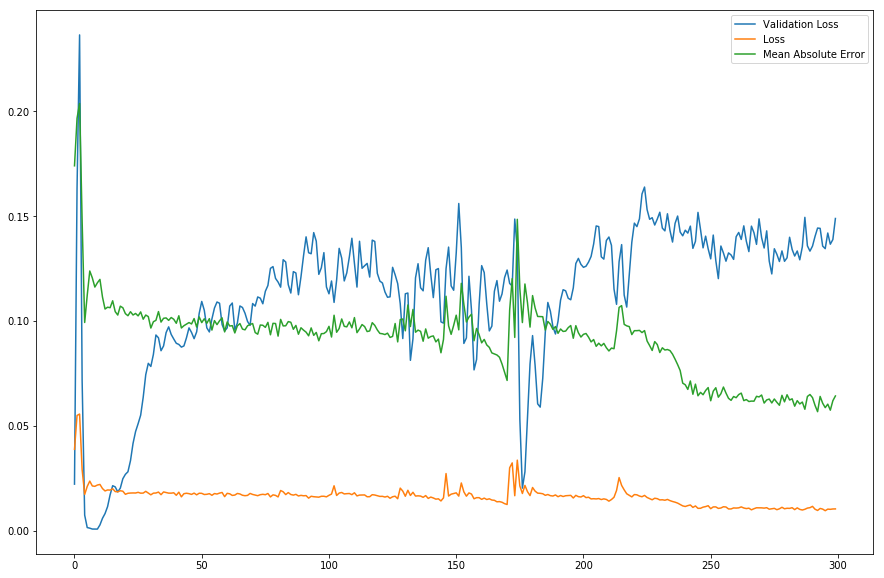

In [1466]:
#Plot history 
history.history["val_loss"]
epochs = range(len(history.history["val_loss"]))

plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.plot(epochs, history.history["loss"], label = "Loss")
plt.plot(epochs, history.history["mean_absolute_error"], label = "Mean Absolute Error")
plt.legend()

In [1467]:
model.evaluate_generator(test_generator)

[0.1488652229309082, 0.37638744711875916]

In [1468]:
predictions = model.predict_generator(test_generator)

In [1469]:
#predictions = np.squeeze(predictions)
predictions.shape

(40, 1)

In [1470]:
predictions

array([[0.6234825 ],
       [0.6216539 ],
       [0.6197394 ],
       [0.61715174],
       [0.6130042 ],
       [0.6088527 ],
       [0.60502   ],
       [0.60076654],
       [0.5962158 ],
       [0.5912124 ],
       [0.58619773],
       [0.58025   ],
       [0.5737761 ],
       [0.5680722 ],
       [0.56295466],
       [0.558017  ],
       [0.5533644 ],
       [0.54901963],
       [0.54536235],
       [0.5418186 ],
       [0.53865904],
       [0.5358237 ],
       [0.5332647 ],
       [0.5307686 ],
       [0.52904993],
       [0.52792954],
       [0.52678514],
       [0.5258596 ],
       [0.5248175 ],
       [0.5236443 ],
       [0.522223  ],
       [0.52125555],
       [0.5200462 ],
       [0.5186593 ],
       [0.5173804 ],
       [0.5161846 ],
       [0.5148224 ],
       [0.51315403],
       [0.51167536],
       [0.510283  ]], dtype=float32)

In [1471]:
y_test

array([0.82563409, 0.8463255 , 0.8463255 , 0.8463255 , 0.885292  ,
       0.8700754 , 0.85419663, 0.85055815, 0.85087898, 0.85087898,
       0.85087898, 0.81204215, 0.82310143, 0.81794046, 0.83018057,
       0.8383042 , 0.8383042 , 0.8383042 , 0.79432706, 0.78730242,
       0.70562178, 0.73230033, 0.70489128, 0.70489128, 0.70489128,
       0.73238899, 0.77261149, 0.82331977, 0.86906507, 0.86837557,
       0.86837557, 0.86837557, 0.89640578, 0.89301296, 0.91153355,
       0.88719666, 0.92006001, 0.92006001, 0.92006001, 0.94856806,
       0.93670344, 0.90820906, 0.91782102, 0.90121176, 0.90121176,
       0.90121176, 0.9148992 , 0.9543707 , 0.95043855, 0.95043855,
       0.95637786, 0.95637786, 0.95637786, 0.94496357, 0.97282995,
       0.97730827, 0.97574494, 0.99786334, 0.99786334, 0.99786334,
       0.99297536, 1.        , 0.97990925, 0.9766871 , 0.97351945,
       0.97351945])

In [1472]:
x_test

array([[0.22697337, 0.22697337],
       [0.24046867, 0.24046867],
       [0.21990812, 0.21990812],
       [0.18830708, 0.18830708],
       [0.19217576, 0.19217576],
       [0.19585592, 0.19585592],
       [0.24686592, 0.24686592],
       [0.26109479, 0.26109479],
       [0.28878206, 0.28878206],
       [0.21970321, 0.21970321],
       [0.19310195, 0.19310195],
       [0.24770605, 0.24770605],
       [0.2491609 , 0.2491609 ],
       [0.26205786, 0.26205786],
       [0.30585506, 0.30585506],
       [0.3423862 , 0.3423862 ],
       [0.34407465, 0.34407465],
       [0.25918094, 0.25918094],
       [0.262189  , 0.262189  ],
       [0.29806443, 0.29806443],
       [0.3385708 , 0.3385708 ],
       [0.37098328, 0.37098328],
       [0.41054297, 0.41054297],
       [0.36474585, 0.36474585],
       [0.28581498, 0.28581498],
       [0.35493482, 0.35493482],
       [0.36395081, 0.36395081],
       [0.44033671, 0.44033671],
       [0.48556008, 0.48556008],
       [0.54855724, 0.54855724],
       [0.

In [1473]:
x_test[:,:2][win_length:]

array([[0.36395081, 0.36395081],
       [0.44033671, 0.44033671],
       [0.48556008, 0.48556008],
       [0.54855724, 0.54855724],
       [0.38590064, 0.38590064],
       [0.43151333, 0.43151333],
       [0.50594031, 0.50594031],
       [0.56058538, 0.56058538],
       [0.59013733, 0.59013733],
       [0.64845437, 0.64845437],
       [0.74312224, 0.74312224],
       [0.64274971, 0.64274971],
       [0.56565073, 0.56565073],
       [0.6223285 , 0.6223285 ],
       [0.67366635, 0.67366635],
       [0.67655557, 0.67655557],
       [0.75855187, 0.75855187],
       [0.78960785, 0.78960785],
       [0.75648639, 0.75648639],
       [0.60587433, 0.60587433],
       [0.64558975, 0.64558975],
       [0.67735471, 0.67735471],
       [0.74430661, 0.74430661],
       [0.60207532, 0.60207532],
       [0.70651733, 0.70651733],
       [0.58740385, 0.58740385],
       [0.62541443, 0.62541443],
       [0.6230129 , 0.6230129 ],
       [0.73109409, 0.73109409],
       [0.80417276, 0.80417276],
       [0.

In [1474]:
df_pred = pd.DataFrame()
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,:2][win_length:])], axis = 1)
df_pred

,0,0,1
0,0.623483,0.363951,0.363951
1,0.621654,0.440337,0.440337
2,0.619739,0.485560,0.485560
3,0.617152,0.548557,0.548557
4,0.613004,0.385901,0.385901
5,0.608853,0.431513,0.431513
6,0.605020,0.505940,0.505940
7,0.600767,0.560585,0.560585
8,0.596216,0.590137,0.590137
9,0.591212,0.648454,0.648454


In [1475]:
rev_trans = scaler.inverse_transform(df_pred)

In [1476]:
rev_trans

array([[  3150.70834036,  88808.        ,  88808.        ],
       [  3148.02969951, 107447.        , 107447.        ],
       [  3145.22524225, 118482.        , 118482.        ],
       [  3141.43468474, 133854.        , 133854.        ],
       [  3135.35917559,  94164.        ,  94164.        ],
       [  3129.27781655, 105294.        , 105294.        ],
       [  3123.66348871, 123455.        , 123455.        ],
       [  3117.43282637, 136789.        , 136789.        ],
       [  3110.76665243, 144000.        , 144000.        ],
       [  3103.43743215, 158230.        , 158230.        ],
       [  3096.09170992, 181330.        , 181330.        ],
       [  3087.37920769, 156838.        , 156838.        ],
       [  3077.89591627, 138025.        , 138025.        ],
       [  3069.54051958, 151855.        , 151855.        ],
       [  3062.04409707, 164382.        , 164382.        ],
       [  3054.81118178, 165087.        , 165087.        ],
       [  3047.99579185, 185095.        

In [1477]:
df_final = df[predictions.shape[0]*-1:]
df_final.count()

Close       40
new_case    40
new_case    40
dtype: int64

In [1478]:
df.loc["2020-10-18":]

,Close,new_case,new_case
2020-10-18,3483.810059,47119,47119
2020-10-19,3426.919922,60443,60443
2020-10-20,3443.120117,60798,60798
2020-10-21,3435.560059,63945,63945
2020-10-22,3453.489990,74632,74632
2020-10-23,3465.389893,83546,83546
2020-10-24,3465.389893,83958,83958
2020-10-25,3465.389893,63243,63243
2020-10-26,3400.969971,63977,63977
2020-10-27,3390.679932,72731,72731


In [1479]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1480]:
df_final

,Close,new_case,new_case,Pred
2020-11-03,3369.159912,88808,88808,3150.708340
2020-11-04,3443.439941,107447,107447,3148.029700
2020-11-05,3510.449951,118482,118482,3145.225242
2020-11-06,3509.439941,133854,133854,3141.434685
2020-11-07,3509.439941,94164,94164,3135.359176
2020-11-08,3509.439941,105294,105294,3129.277817
2020-11-09,3550.500000,123455,123455,3123.663489
2020-11-10,3545.530029,136789,136789,3117.432826
2020-11-11,3572.659912,144000,144000,3110.766652
2020-11-12,3537.010010,158230,158230,3103.437432


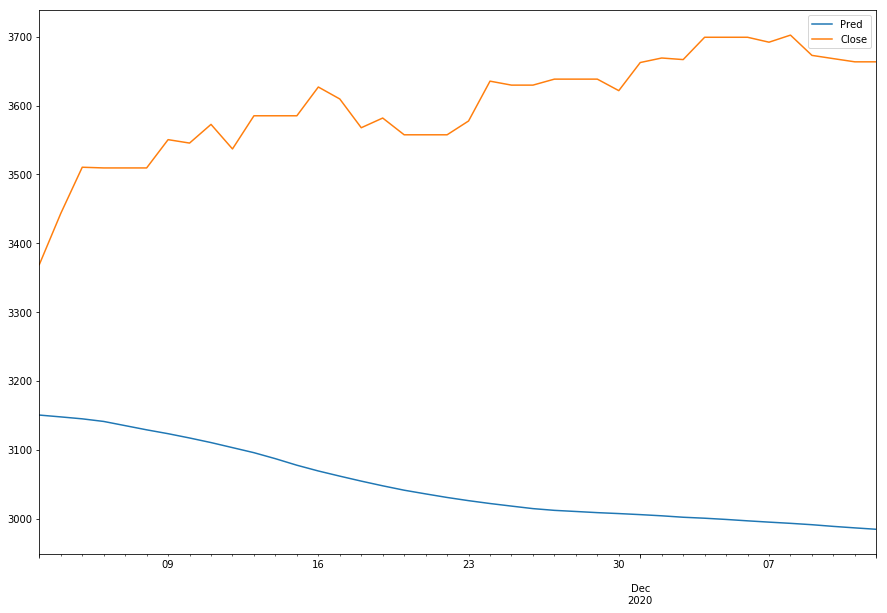

In [1481]:
df_final[['Pred',"Close"]].plot()

In [651]:
merged_df

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close
2020-01-22,1,1,0,0,3330.020020,3337.770020,3320.040039,3321.750000
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039
2020-01-24,2,1,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-26,5,3,0,0,3333.100098,3333.179932,3281.530029,3295.469971
2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883
2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990
2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902
2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912
2020-01-31,7,2,0,0,3282.330078,3282.330078,3214.679932,3225.520020


In [652]:
df

,new_case,Open,Close
2020-01-22,1,3330.020020,3321.750000
2020-01-23,0,3315.770020,3325.540039
2020-01-24,1,3333.100098,3295.469971
2020-01-25,0,3333.100098,3295.469971
2020-01-26,3,3333.100098,3295.469971
2020-01-27,0,3247.159912,3243.629883
2020-01-28,0,3255.350098,3276.239990
2020-01-29,0,3289.459961,3273.399902
2020-01-30,0,3256.449951,3283.659912
2020-01-31,2,3282.330078,3225.520020


# First Wave: Feb 15th - May 22th

## Pearson R Calculation




In [659]:
cor_df = df

cor_df = cor_df[["Open","Close", "new_case"]]
cor_df

,Open,Close,new_case
2020-01-22,3330.020020,3321.750000,1
2020-01-23,3315.770020,3325.540039,0
2020-01-24,3333.100098,3295.469971,1
2020-01-25,3333.100098,3295.469971,0
2020-01-26,3333.100098,3295.469971,3
2020-01-27,3247.159912,3243.629883,0
2020-01-28,3255.350098,3276.239990,0
2020-01-29,3289.459961,3273.399902,0
2020-01-30,3256.449951,3283.659912,0
2020-01-31,3282.330078,3225.520020,2


In [707]:
for i in range(50):
    name = "Shifted by " + str(1+i) + " Days Back"
    cor_df[name] = cor_df["new_case"].shift((-(i+1)))
#cor_df = cor_df.dropna(0)
#add total number of cases
#start with 5 days shifting
cor_df

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,...,Shifted by 41 Days Back,Shifted by 42 Days Back,Shifted by 43 Days Back,Shifted by 44 Days Back,Shifted by 45 Days Back,Shifted by 46 Days Back,Shifted by 47 Days Back,Shifted by 48 Days Back,Shifted by 49 Days Back,Shifted by 50 Days Back
2020-01-22,3330.020020,3321.750000,1,0.0,1.0,0.0,3.0,0.0,0.0,0.0,...,24.0,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0
2020-01-23,3315.770020,3325.540039,0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0
2020-01-24,3333.100098,3295.469971,1,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0
2020-01-25,3333.100098,3295.469971,0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,...,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0
2020-01-26,3333.100098,3295.469971,3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0
2020-01-27,3247.159912,3243.629883,0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,...,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0
2020-01-28,3255.350098,3276.239990,0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,...,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0
2020-01-29,3289.459961,3273.399902,0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,...,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0
2020-01-30,3256.449951,3283.659912,0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,...,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0
2020-01-31,3282.330078,3225.520020,2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0,5835.0


In [711]:
shift_df= cor_df.loc["2020-02-15":"2020-05-22"]
shift_df

,Open,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,...,Shifted by 41 Days Back,Shifted by 42 Days Back,Shifted by 43 Days Back,Shifted by 44 Days Back,Shifted by 45 Days Back,Shifted by 46 Days Back,Shifted by 47 Days Back,Shifted by 48 Days Back,Shifted by 49 Days Back,Shifted by 50 Days Back
2020-02-15,3378.080078,3380.159912,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,18156.0,19309.0,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0
2020-02-16,3378.080078,3380.159912,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,19309.0,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0
2020-02-17,3378.080078,3380.159912,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,18113.0,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0
2020-02-18,3369.040039,3370.290039,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,22064.0,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0
2020-02-19,3380.389893,3386.149902,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,22715.0,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0
2020-02-20,3380.449951,3373.229980,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,27271.0,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0
2020-02-21,3360.500000,3337.750000,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,26090.0,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0
2020-02-22,3360.500000,3337.750000,0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,...,35085.0,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0
2020-02-23,3360.500000,3337.750000,0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,...,30664.0,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0,24600.0
2020-02-24,3257.610107,3225.889893,0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,...,25711.0,42594.0,22071.0,31700.0,31673.0,34182.0,32735.0,28542.0,24600.0,26082.0


In [712]:
pearson_df = shift_df.corr()
pearson_df[["Close","Open"]]

,Close,Open
Open,0.974363,1.000000
Close,1.000000,0.974363
new_case,-0.277997,-0.302916
Shifted by 1 Days Back,-0.317782,-0.333688
Shifted by 2 Days Back,-0.356644,-0.373457
Shifted by 3 Days Back,-0.392182,-0.402897
Shifted by 4 Days Back,-0.424318,-0.446280
Shifted by 5 Days Back,-0.470578,-0.486569
Shifted by 6 Days Back,-0.499541,-0.516630
Shifted by 7 Days Back,-0.535230,-0.553645


## Coefficient of Determination R^2

In [713]:
fw_df = shift_df

In [714]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [715]:
fwres_df = ""
fwres_df = pd.DataFrame(columns = ["RMSE", "R Squared"])
RMSE = []
r2 = []

scaled_df = scaler.fit_transform(fw_df)
scaled_df = pd.DataFrame(scaled_df)
loop = scaled_df.columns
loop = loop.drop(loop[[0,1,2]])

for i in loop:
    target = 1
    predictors = [2, i]
    
    x = scaled_df[predictors].values
    y = scaled_df[target].values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 30, shuffle = True)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_test_lr = lr.predict(x_test)
    
    RMSE.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
    r2.append(r2_score(y_test, pred_test_lr))

fwres_df["RMSE"] = RMSE
fwres_df["R Squared"] = r2

fwres_df


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,RMSE,R Squared
0,0.208728,0.169432
1,0.202104,0.221307
2,0.199722,0.239555
3,0.190024,0.311611
4,0.197291,0.257955
5,0.156530,0.532902
6,0.181793,0.369962
7,0.153915,0.548379
8,0.159951,0.512259
9,0.146524,0.590706


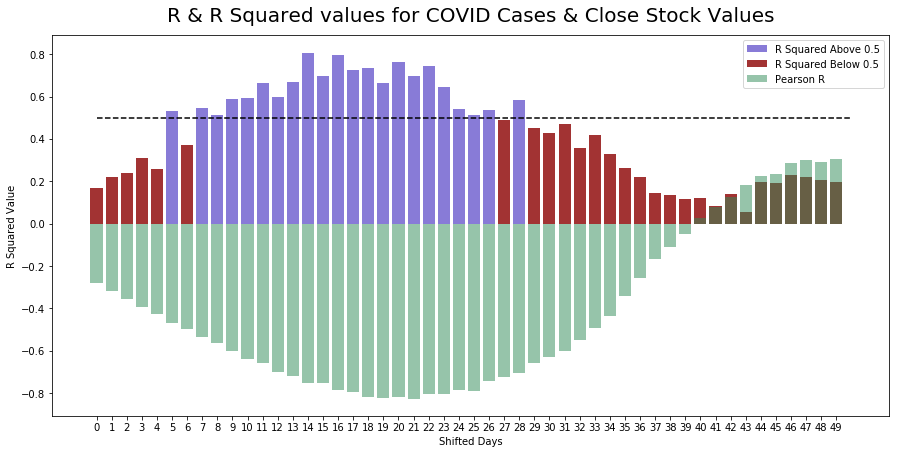

In [721]:
threshold = 0.5
r2 = fwres_df["R Squared"]

r = pearson_df["Close"]

#r = r.reset_index()
#r = r.drop(columns =['index'])
r = r.drop(labels = ['Open','Close','Shifted by 50 Days Back'])
#r_cases = correlation_df["COVID Cases"]
#r_cases = r_cases.drop(labels=['Exits', 'Average Entries', 'COVID Cases', 'COVID Deaths'])

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize=(15,7))

s = list(range(0, 50))

above_threshold = np.maximum(r2, threshold)
above_threshold = above_threshold.replace( threshold, 0)
below_threshold = np.minimum(r2, threshold)
below_threshold = below_threshold.replace( threshold, 0)

ax.bar(s,above_threshold, alpha = 0.8, color = "slateblue", label = "R Squared Above 0.5")
ax.bar(s,below_threshold, alpha = 0.8, color = "darkred", label = "R Squared Below 0.5")
ax.bar(s, r, alpha = 0.5, color = "seagreen", label = "Pearson R")

ax.plot([0,50],[threshold,threshold], "k--" )


plt.title("R & R Squared values for COVID Cases & Close Stock Values", y = 1.02, fontsize = 20)
plt.xlabel("Shifted Days", y = 1.02)
plt.ylabel("R Squared Value")
plt.xticks(range(0, 50));
plt.legend()

### NEW LSTM MODEL WITH ONLY FIRST WAVE DATA

In [1244]:
# Dropping columns Shifted by 26 days onwards because they are irrelevant 
cols = shift_df.columns

fw_df = shift_df.drop(columns = cols[29:])
fw_df = fw_df.drop(columns = cols[0])
fw_df


,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 17 Days Back,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back
2020-02-15,3380.159912,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0
2020-02-16,3380.159912,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,22.0,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0
2020-02-17,3380.159912,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,62.0,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0
2020-02-18,3370.290039,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,51.0,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0
2020-02-19,3386.149902,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,63.0,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0
2020-02-20,3373.229980,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,153.0,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0
2020-02-21,3337.750000,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,...,219.0,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0
2020-02-22,3337.750000,0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,...,303.0,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0
2020-02-23,3337.750000,0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,...,285.0,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0
2020-02-24,3225.889893,0,0.0,0.0,1.0,0.0,10.0,6.0,25.0,24.0,...,430.0,299.0,371.0,1206.0,772.0,2795.0,3423.0,4759.0,3568.0,5835.0


In [1245]:
fw_df.describe()

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 17 Days Back,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2829.765498,16263.469388,16534.326531,16691.112245,16945.877551,17112.755102,17314.153061,17532.122449,17718.479592,17960.295918,...,19951.010204,20128.612245,20338.204082,20560.632653,20789.479592,21048.867347,21271.081633,21459.561224,21748.561224,21980.244898
std,263.720842,13023.061039,12957.189927,12847.553871,12760.409735,12642.906788,12524.139665,12405.014882,12275.453134,12155.646220,...,10856.655736,10668.036898,10468.847771,10263.150958,10048.915863,9834.180563,9600.406658,9361.176577,9135.760811,8869.862395
min,2237.399902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,22.000000,51.000000,51.000000,63.000000,153.000000,219.000000,285.000000,285.000000,299.000000
25%,2711.020020,288.500000,300.000000,320.000000,385.750000,515.500000,880.500000,1603.250000,2952.000000,3459.250000,...,14788.500000,15116.000000,15612.250000,16504.750000,17075.000000,17459.000000,17577.000000,17706.750000,17911.250000,18123.750000
50%,2844.400024,21160.000000,21782.500000,21782.500000,22067.500000,22067.500000,22067.500000,22067.500000,22067.500000,22279.500000,...,22867.500000,22867.500000,22867.500000,22867.500000,22867.500000,23235.000000,23235.000000,23235.000000,23601.000000,23601.000000
75%,2954.142456,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,26992.250000,...,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,27256.250000,28115.500000,28115.500000
max,3386.149902,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,...,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000,42594.000000


In [1246]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(fw_df)

data_scaled.shape

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(98, 28)

In [1247]:
features = data_scaled[:,1:28]
target = data_scaled[:,0]
target

array([0.99478565, 0.99478565, 0.99478565, 0.98619381, 1.        ,
       0.98875306, 0.95786733, 0.95786733, 0.95786733, 0.86049183,
       0.77546033, 0.76517083, 0.64536244, 0.62400006, 0.62400006,
       0.62400006, 0.74239833, 0.66678582, 0.77712315, 0.68469209,
       0.63979997, 0.63979997, 0.63979997, 0.44322973, 0.56133195,
       0.43872033, 0.21174319, 0.41229172, 0.41229172, 0.41229172,
       0.12947115, 0.25400656, 0.13989136, 0.14971925, 0.05877695,
       0.05877695, 0.05877695, 0.        , 0.18274662, 0.20732114,
       0.34182387, 0.26469647, 0.26469647, 0.26469647, 0.33884657,
       0.30223302, 0.2029163 , 0.25201306, 0.218716  , 0.218716  ,
       0.218716  , 0.37108164, 0.36736454, 0.44620681, 0.48088807,
       0.48088807, 0.48088807, 0.48088807, 0.45634819, 0.52984562,
       0.4752646 , 0.48935813, 0.5546552 , 0.5546552 , 0.5546552 ,
       0.50991078, 0.43452462, 0.48914921, 0.48783473, 0.52173239,
       0.52173239, 0.52173239, 0.55806753, 0.54493144, 0.61119

### Splitting into train & test data

In [1248]:
y_train.size

78

In [1254]:
#features = features.reshape((len(features), 27, 1))

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 40, shuffle = False)

x_train = x_train.reshape(len(x_train), 1, x_train.shape[1])
x_test = x_test.reshape(len(x_test), 1, x_test.shape[1])
#y_train = y_train.reshape(len(y_train), 1, y_train.shape[1])
#y_test = y_test.reshape(len(y_test), 1, y_test.shape[1])

In [1260]:
x_test.shape

(20, 1, 27)

### LSTM Architecture

In [1256]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (1,27), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model.add(tf.keras.layers.LSTM(128, return_sequences = True))
#model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model.add(tf.keras.layers.Dropout(0.1)) #regularization method not to over fit, look into this
#model.add(LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [1257]:
model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (None, 1, 128)            79872     
_________________________________________________________________
leaky_re_lu_97 (LeakyReLU)   (None, 1, 128)            0         
_________________________________________________________________
lstm_173 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 65        
Total params: 129,345
Trainable params: 129,345
Non-trainable params: 0
_________________________________________________________________


In [1259]:
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = model.fit(x_train, y_train , epochs = 300, validation_data= (x_test, y_test), shuffle = False, verbose = 1)

Epoch 1/300
3/3 [==============================] - 1s 180ms/step - loss: 0.0117 - mean_absolute_error: 0.0848 - val_loss: 0.0079 - val_mean_absolute_error: 0.0754
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0992 - val_loss: 0.0089 - val_mean_absolute_error: 0.0811
Epoch 3/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0083 - mean_absolute_error: 0.0773 - val_loss: 0.0025 - val_mean_absolute_error: 0.0445
Epoch 4/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0803 - val_loss: 0.0026 - val_mean_absolute_error: 0.0453
Epoch 5/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0720 - val_loss: 0.0045 - val_mean_absolute_error: 0.0510
Epoch 6/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0085 - mean_absolute_error: 0.0785 - val_loss: 0.0068 - val_mean_absolute_error: 0.0683
Epoch 7/300
3/3 [=============

3/3 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0519 - val_loss: 0.0046 - val_mean_absolute_error: 0.0515
Epoch 102/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mean_absolute_error: 0.0512 - val_loss: 0.0047 - val_mean_absolute_error: 0.0516
Epoch 103/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0515 - val_loss: 0.0046 - val_mean_absolute_error: 0.0518
Epoch 104/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0504 - val_loss: 0.0048 - val_mean_absolute_error: 0.0519
Epoch 105/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0517 - val_loss: 0.0046 - val_mean_absolute_error: 0.0522
Epoch 106/300
3/3 [==============================] - 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0497 - val_loss: 0.0050 - val_mean_absolute_error: 0.0521
Epoch 107/300
3/3 [==============

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0519 - val_loss: 0.0052 - val_mean_absolute_error: 0.0555
Epoch 202/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0029 - mean_absolute_error: 0.0447 - val_loss: 0.0065 - val_mean_absolute_error: 0.0618
Epoch 203/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0422 - val_loss: 0.0051 - val_mean_absolute_error: 0.0554
Epoch 204/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0028 - mean_absolute_error: 0.0413 - val_loss: 0.0058 - val_mean_absolute_error: 0.0572
Epoch 205/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0462 - val_loss: 0.0053 - val_mean_absolute_error: 0.0557
Epoch 206/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0411 - val_loss: 0.0052 - val_mean_absolute_error: 0.0555
Epoch 207/300
3/3 [==============

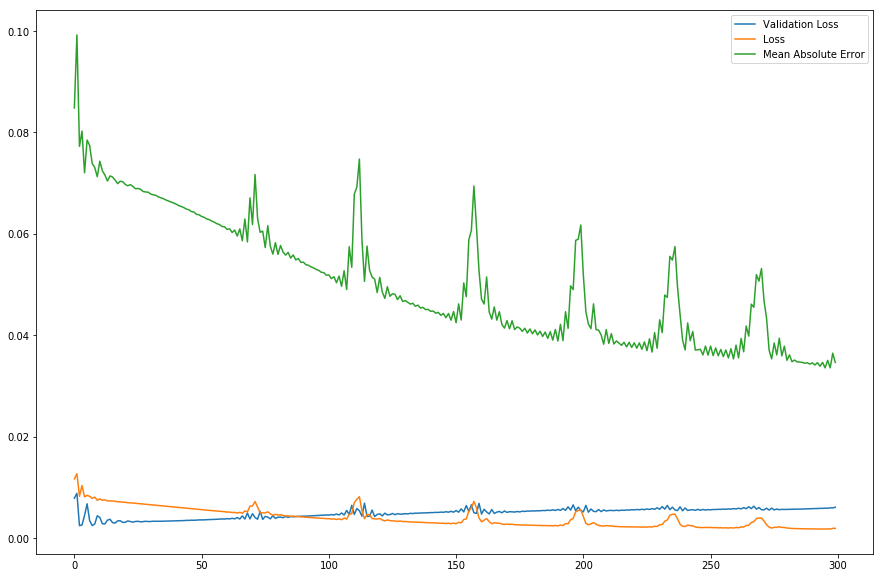

In [1266]:
history.history["val_loss"]
epochs = range(len(history.history["val_loss"]))

plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.plot(epochs, history.history["loss"], label = "Loss")
plt.plot(epochs, history.history["mean_absolute_error"], label = "Mean Absolute Error")
plt.legend()

In [1261]:
model.evaluate(x_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00


[0.0, 0.0]

In [1262]:
predictions = model.predict(x_test)

In [1267]:
predictions.shape

(20, 1)

In [1268]:
y_test

array([0.51648319, 0.52695546, 0.54932756, 0.53189991, 0.56042658,
       0.60274224, 0.60274224, 0.60274224, 0.60308164, 0.55079018,
       0.50716004, 0.53545166, 0.54520135, 0.54520135, 0.54520135,
       0.62373015, 0.59677044, 0.63913837, 0.61902947, 0.62507077])

In [1269]:
x_test.shape

(20, 1, 27)

In [1270]:
x_test = x_test.reshape(x_test.shape).reshape(-1, x_test.shape[2])

In [1271]:
fw_pred = pd.DataFrame()
fw_pred = pd.concat([pd.DataFrame( predictions, columns = ["Pred"]), pd.DataFrame(x_test[:,:][0:])], axis = 1)
#fw_pred["Pred"] = predictions
fw_pred

,Pred,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,0.707901,0.700286,0.453538,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,...,0.532557,0.479799,0.569518,0.622735,0.359785,0.584670,0.380767,0.459760,0.498145,0.424778
1,0.566825,0.453538,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,...,0.479799,0.569811,0.622735,0.359965,0.585549,0.381730,0.460602,0.498145,0.424969,0.553233
2,0.535175,0.527962,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,...,0.569811,0.622992,0.359965,0.585666,0.383038,0.461441,0.498926,0.424969,0.553381,0.612318
3,0.561913,0.539184,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,...,0.622992,0.360401,0.585666,0.383212,0.462580,0.499705,0.425864,0.553381,0.612447,0.348363
4,0.643487,0.730126,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,...,0.360401,0.585949,0.383212,0.462732,0.500764,0.426757,0.554077,0.612447,0.348578,0.583544
5,0.581658,0.594356,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,...,0.585949,0.383632,0.462732,0.500905,0.427970,0.554770,0.613050,0.348578,0.583682,0.340655
6,0.558821,0.633516,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,...,0.383632,0.463098,0.500905,0.428132,0.555712,0.613652,0.349593,0.583682,0.340873,0.478756
7,0.621187,0.570010,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,...,0.463098,0.501245,0.428132,0.555838,0.614469,0.350604,0.584330,0.340873,0.478929,0.680033
8,0.431493,0.412006,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,0.551815,...,0.501245,0.428521,0.555838,0.614578,0.351979,0.584977,0.341900,0.478929,0.680139,0.680979
9,0.559777,0.504789,0.488778,0.633775,0.534559,0.752735,0.314857,0.580011,0.551815,0.532798,...,0.428521,0.556140,0.614578,0.352161,0.585855,0.342923,0.479740,0.680139,0.681084,0.414824


In [1272]:
rev_trans = scaler.inverse_transform(fw_pred)
#fw_pred["Close"] = y_test
rev_trans

array([[ 3050.6015877 , 29828.        , 19318.        , 22488.        ,
        22966.        , 31099.        , 25316.        , 26984.        ,
        24279.        , 17549.        , 21501.        , 20819.        ,
        26995.        , 22769.        , 32062.        , 13411.        ,
        24705.        , 23504.        , 22694.        , 20448.        ,
        24280.        , 26544.        , 15365.        , 24967.        ,
        16354.        , 19737.        , 21361.        , 18265.        ],
       [ 2888.53995237, 19318.        , 22488.        , 22966.        ,
        31099.        , 25316.        , 26984.        , 24279.        ,
        17549.        , 21501.        , 20819.        , 26995.        ,
        22769.        , 32062.        , 13411.        , 24705.        ,
        23504.        , 22694.        , 20448.        , 24280.        ,
        26544.        , 15365.        , 24967.        , 16354.        ,
        19737.        , 21361.        , 18265.        , 23698. 

In [1273]:
df_final = fw_df[predictions.shape[0]*-1:]
df_final.count()

Close                      20
new_case                   20
Shifted by 1 Days Back     20
Shifted by 2 Days Back     20
Shifted by 3 Days Back     20
Shifted by 4 Days Back     20
Shifted by 5 Days Back     20
Shifted by 6 Days Back     20
Shifted by 7 Days Back     20
Shifted by 8 Days Back     20
Shifted by 9 Days Back     20
Shifted by 10 Days Back    20
Shifted by 11 Days Back    20
Shifted by 12 Days Back    20
Shifted by 13 Days Back    20
Shifted by 14 Days Back    20
Shifted by 15 Days Back    20
Shifted by 16 Days Back    20
Shifted by 17 Days Back    20
Shifted by 18 Days Back    20
Shifted by 19 Days Back    20
Shifted by 20 Days Back    20
Shifted by 21 Days Back    20
Shifted by 22 Days Back    20
Shifted by 23 Days Back    20
Shifted by 24 Days Back    20
Shifted by 25 Days Back    20
Shifted by 26 Days Back    20
dtype: int64

In [1274]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1275]:
df_final

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 18 Days Back,Shifted by 19 Days Back,Shifted by 20 Days Back,Shifted by 21 Days Back,Shifted by 22 Days Back,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back,Pred
2020-05-03,2830.709961,29828,19318.0,22488.0,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,...,20448.0,24280.0,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,3050.601588
2020-05-04,2842.739990,19318,22488.0,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,...,24280.0,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,2888.539952
2020-05-05,2868.439941,22488,22966.0,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,...,26544.0,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,2852.182213
2020-05-06,2848.419922,22966,31099.0,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,...,15365.0,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,2882.897271
2020-05-07,2881.189941,31099,25316.0,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,...,24967.0,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,2976.605703
2020-05-08,2929.800049,25316,26984.0,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,...,16354.0,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,2905.580084
2020-05-09,2929.800049,26984,24279.0,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,...,19737.0,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,2879.345552
2020-05-10,2929.800049,24279,17549.0,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,...,21361.0,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,2950.988025
2020-05-11,2930.189941,17549,21501.0,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,23504.0,...,18265.0,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,29101.0,2733.077262
2020-05-12,2870.120117,21501,20819.0,26995.0,22769.0,32062.0,13411.0,24705.0,23504.0,22694.0,...,23698.0,26197.0,15033.0,24980.0,14707.0,20548.0,29061.0,29101.0,17844.0,2880.444235


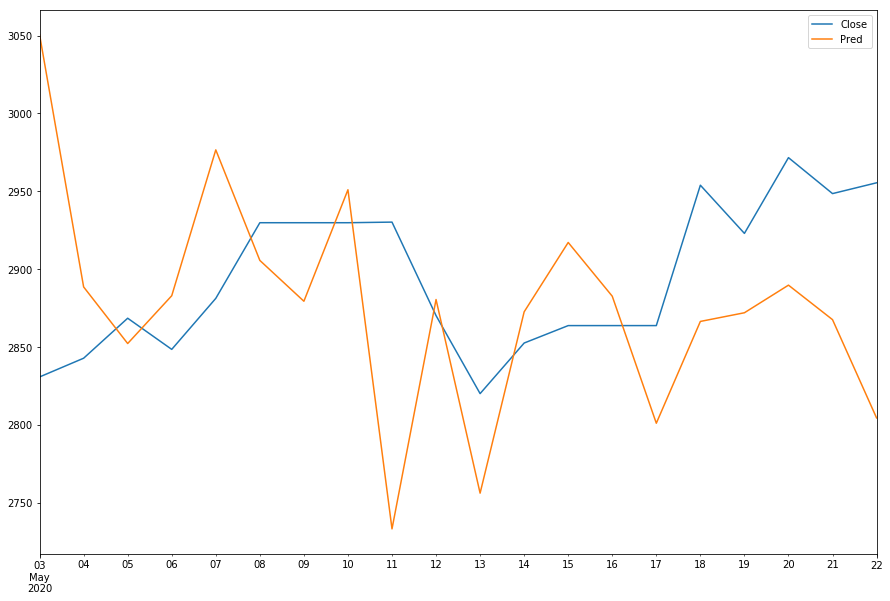

In [1276]:
df_final[["Close","Pred"]].plot()

# Second Wave: June 5th- September 15th

## Pearson R 

In [1390]:
sw_df = cor_df.loc["2020-06-05":"2020-09-15"]

In [1383]:
swpearson_df = sw_df.corr()
swpearson_df[["Close"]]

,Close
Open,0.974037
Close,1.000000
new_case,0.095760
Shifted by 1 Days Back,0.065002
Shifted by 2 Days Back,0.037376
Shifted by 3 Days Back,-0.012045
Shifted by 4 Days Back,-0.070319
Shifted by 5 Days Back,-0.137529
Shifted by 6 Days Back,-0.182553
Shifted by 7 Days Back,-0.210802


## Coefficient of Determination (R^2) for Second Wave

In [1384]:
swres_df = ""
swres_df = pd.DataFrame(columns = ["RMSE", "R Squared"])
RMSE = []
r2 = []

sscaled_df = scaler.fit_transform(sw_df)
sscaled_df = pd.DataFrame(sscaled_df)
loop = scaled_df.columns
loop = loop.drop(loop[[0,1,2]])

for i in loop:
    target = 1
    predictors = [2, i]
    
    x = sscaled_df[predictors].values
    y = sscaled_df[target].values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 30, shuffle = True)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_test_lr = lr.predict(x_test)
    
    RMSE.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
    r2.append(r2_score(y_test, pred_test_lr))

swres_df["RMSE"] = RMSE
swres_df["R Squared"] = r2

swres_df


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,RMSE,R Squared
0,0.265888,-0.008099
1,0.264081,0.005553
2,0.263524,0.009746
3,0.259092,0.042772
4,0.247273,0.128113
5,0.236008,0.205746
6,0.210929,0.365577
7,0.237359,0.196630
8,0.243150,0.156950
9,0.244869,0.144983


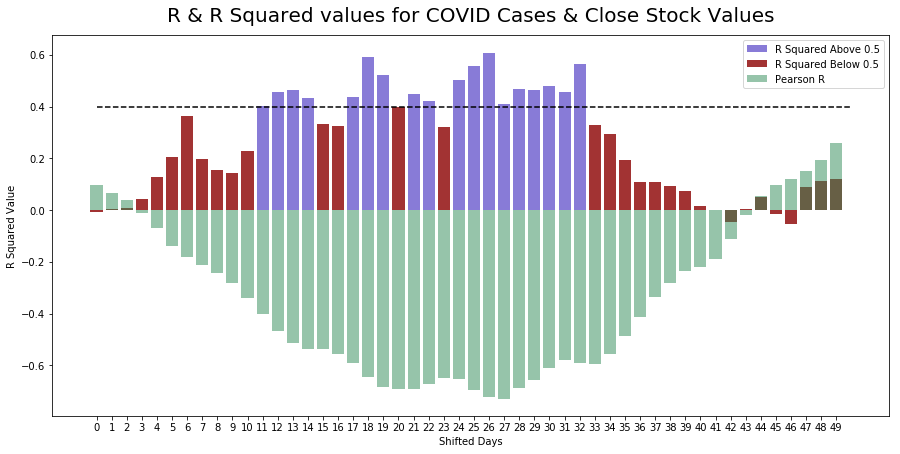

In [1385]:
threshold = 0.4
r2 = swres_df["R Squared"]

r = swpearson_df["Close"]

#r = r.reset_index()
#r = r.drop(columns =['index'])
r = r.drop(labels = ['Open','Close','Shifted by 50 Days Back'])
#r_cases = correlation_df["COVID Cases"]
#r_cases = r_cases.drop(labels=['Exits', 'Average Entries', 'COVID Cases', 'COVID Deaths'])

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize=(15,7))

s = list(range(0, 50))

above_threshold = np.maximum(r2, threshold)
above_threshold = above_threshold.replace( threshold, 0)
below_threshold = np.minimum(r2, threshold)
below_threshold = below_threshold.replace( threshold, 0)

ax.bar(s,above_threshold, alpha = 0.8, color = "slateblue", label = "R Squared Above 0.5")
ax.bar(s,below_threshold, alpha = 0.8, color = "darkred", label = "R Squared Below 0.5")
ax.bar(s, r, alpha = 0.5, color = "seagreen", label = "Pearson R")

ax.plot([0,50],[threshold,threshold], "k--" )


plt.title("R & R Squared values for COVID Cases & Close Stock Values", y = 1.02, fontsize = 20)
plt.xlabel("Shifted Days", y = 1.02)
plt.ylabel("R Squared Value")
plt.xticks(range(0, 50));
plt.legend()

## LSTM Model for Second Wave

In [1528]:
sw_df = cor_df.loc["2020-06-05":"2020-09-15"]

In [1529]:
cols = sw_df.columns

sw_df = sw_df.drop(columns = cols[35:])
sw_df = sw_df.drop(columns = cols[0])
sw_df

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back,Shifted by 27 Days Back,Shifted by 28 Days Back,Shifted by 29 Days Back,Shifted by 30 Days Back,Shifted by 31 Days Back,Shifted by 32 Days Back
2020-06-05,3193.929932,29061,29101.0,17844.0,17661.0,17429.0,20562.0,21860.0,22478.0,25483.0,...,41012.0,35901.0,43750.0,54451.0,52823.0,57748.0,52140.0,44268.0,46474.0,50373.0
2020-06-06,3193.929932,29101,17844.0,17661.0,17429.0,20562.0,21860.0,22478.0,25483.0,21930.0,...,35901.0,43750.0,54451.0,52823.0,57748.0,52140.0,44268.0,46474.0,50373.0,64873.0
2020-06-07,3193.929932,17844,17661.0,17429.0,20562.0,21860.0,22478.0,25483.0,21930.0,18690.0,...,43750.0,54451.0,52823.0,57748.0,52140.0,44268.0,46474.0,50373.0,64873.0,59273.0
2020-06-08,3232.389893,17661,17429.0,20562.0,21860.0,22478.0,25483.0,21930.0,18690.0,28625.0,...,54451.0,52823.0,57748.0,52140.0,44268.0,46474.0,50373.0,64873.0,59273.0,66464.0
2020-06-09,3207.179932,17429,20562.0,21860.0,22478.0,25483.0,21930.0,18690.0,28625.0,22990.0,...,52823.0,57748.0,52140.0,44268.0,46474.0,50373.0,64873.0,59273.0,66464.0,62915.0
2020-06-10,3190.139893,20562,21860.0,22478.0,25483.0,21930.0,18690.0,28625.0,22990.0,27957.0,...,57748.0,52140.0,44268.0,46474.0,50373.0,64873.0,59273.0,66464.0,62915.0,60518.0
2020-06-11,3002.100098,21860,22478.0,25483.0,21930.0,18690.0,28625.0,22990.0,27957.0,32375.0,...,52140.0,44268.0,46474.0,50373.0,64873.0,59273.0,66464.0,62915.0,60518.0,59023.0
2020-06-12,3041.310059,22478,25483.0,21930.0,18690.0,28625.0,22990.0,27957.0,32375.0,32421.0,...,44268.0,46474.0,50373.0,64873.0,59273.0,66464.0,62915.0,60518.0,59023.0,61193.0
2020-06-13,3041.310059,25483,21930.0,18690.0,28625.0,22990.0,27957.0,32375.0,32421.0,27604.0,...,46474.0,50373.0,64873.0,59273.0,66464.0,62915.0,60518.0,59023.0,61193.0,67656.0
2020-06-14,3041.310059,21930,18690.0,28625.0,22990.0,27957.0,32375.0,32421.0,27604.0,26703.0,...,50373.0,64873.0,59273.0,66464.0,62915.0,60518.0,59023.0,61193.0,67656.0,72315.0


In [1530]:
sw_df.describe()

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,...,Shifted by 23 Days Back,Shifted by 24 Days Back,Shifted by 25 Days Back,Shifted by 26 Days Back,Shifted by 27 Days Back,Shifted by 28 Days Back,Shifted by 29 Days Back,Shifted by 30 Days Back,Shifted by 31 Days Back,Shifted by 32 Days Back
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,3262.117095,45904.262136,46031.466019,46178.330097,46483.281553,46724.854369,46918.893204,47103.281553,47375.126214,47560.932039,...,49503.873786,49675.378641,49847.796117,49869.145631,49795.766990,49746.912621,49771.087379,49883.417476,50137.766990,50207.048544
std,140.196867,14852.174466,14762.338723,14667.192931,14396.334944,14113.943180,13841.998552,13612.043459,13380.594945,13162.579698,...,11324.349411,11328.246593,11251.430047,11241.828280,11236.293249,11233.941169,11253.989099,11335.314195,11500.792738,11499.999423
min,3002.100098,17429.000000,17429.000000,17429.000000,17429.000000,17429.000000,18690.000000,18690.000000,18690.000000,18690.000000,...,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000
25%,3148.685059,34644.000000,35135.500000,35689.000000,36774.000000,37735.000000,37735.000000,37870.500000,38221.000000,38614.000000,...,40580.000000,40580.000000,41126.500000,41126.500000,41126.500000,41126.500000,41126.500000,41126.500000,41126.500000,41126.500000
50%,3246.219971,45450.000000,45450.000000,45450.000000,45468.000000,45468.000000,45468.000000,45468.000000,46474.000000,46474.000000,...,47366.000000,47758.000000,48865.000000,48865.000000,47758.000000,47758.000000,47758.000000,47758.000000,47791.000000,48865.000000
75%,3374.140015,57288.000000,57288.000000,57288.000000,57288.000000,57288.000000,57288.000000,57288.000000,57288.000000,57288.000000,...,57288.000000,57936.000000,57936.000000,57936.000000,57936.000000,57936.000000,58400.500000,58843.000000,59016.000000,59016.000000
max,3580.840088,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,...,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000,75081.000000


In [1531]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(sw_df)

data_scaled.shape

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(103, 34)

In [1533]:
features = data_scaled[:, 1:]
target = data_scaled[:, 0]
target

array([0.33146117, 0.33146117, 0.33146117, 0.39791582, 0.35435573,
       0.32491239, 0.        , 0.06775056, 0.06775056, 0.06775056,
       0.11143172, 0.21190845, 0.19246967, 0.19566643, 0.16525537,
       0.16525537, 0.16525537, 0.20002075, 0.22322622, 0.08333618,
       0.14109948, 0.01200876, 0.01200876, 0.01200876, 0.08836419,
       0.16966158, 0.19656497, 0.22101447, 0.22101447, 0.22101447,
       0.22101447, 0.3069079 , 0.24746859, 0.29000906, 0.25909727,
       0.3161004 , 0.3161004 , 0.3161004 , 0.26457455, 0.33766445,
       0.38784249, 0.36885298, 0.38468032, 0.38468032, 0.38468032,
       0.43152365, 0.44095787, 0.47330395, 0.40356605, 0.36895633,
       0.36895633, 0.36895633, 0.41004565, 0.37381181, 0.44292748,
       0.42181269, 0.46483745, 0.46483745, 0.46483745, 0.5054256 ,
       0.52598735, 0.56272234, 0.59968176, 0.60334509, 0.60334509,
       0.60334509, 0.61922431, 0.57295132, 0.65357502, 0.64161772,
       0.64061583, 0.64061583, 0.64061583, 0.65640857, 0.66986

### Splitting data into Train(80%) & Test(20%)

In [1534]:
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = 40,
                                                    shuffle = False)

#formatting data so it can be used for LSTM purposes 
#LSTM takes 3D input [number of inputs, windows_size, number of features]
x_train = x_train.reshape(len(x_train), 1, x_train.shape[1])
x_test = x_test.reshape(len(x_test), 1, x_test.shape[1])

In [1535]:
x_test.shape

(21, 1, 33)

### LSTM Architecture

In [1536]:
smodel = tf.keras.Sequential()
smodel.add(tf.keras.layers.LSTM(128, input_shape = (1,33), return_sequences = True))
smodel.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
smodel.add(tf.keras.layers.LSTM(64, return_sequences = False))
smodel.add(tf.keras.layers.Dense(1, activation = "linear"))

In [1537]:
smodel.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_199 (LSTM)              (None, 1, 128)            82944     
_________________________________________________________________
leaky_re_lu_102 (LeakyReLU)  (None, 1, 128)            0         
_________________________________________________________________
lstm_200 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 65        
Total params: 132,417
Trainable params: 132,417
Non-trainable params: 0
_________________________________________________________________


In [1538]:
smodel.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = smodel.fit(x_train, y_train, epochs = 300, validation_data = (x_test, y_test), shuffle = False, verbose = 1)

Epoch 1/300
3/3 [==============================] - 1s 169ms/step - loss: 0.1666 - mean_absolute_error: 0.3614 - val_loss: 0.5156 - val_mean_absolute_error: 0.7071
Epoch 2/300
3/3 [==============================] - 0s 12ms/step - loss: 0.1322 - mean_absolute_error: 0.3096 - val_loss: 0.4526 - val_mean_absolute_error: 0.6604
Epoch 3/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1015 - mean_absolute_error: 0.2581 - val_loss: 0.3851 - val_mean_absolute_error: 0.6063
Epoch 4/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0765 - mean_absolute_error: 0.2159 - val_loss: 0.3164 - val_mean_absolute_error: 0.5456
Epoch 5/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0637 - mean_absolute_error: 0.2091 - val_loss: 0.2578 - val_mean_absolute_error: 0.4877
Epoch 6/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0653 - mean_absolute_error: 0.2210 - val_loss: 0.2197 - val_mean_absolute_error: 0.4461
Epoch 7/300
3/3 [============

3/3 [==============================] - 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0647 - val_loss: 0.0853 - val_mean_absolute_error: 0.2739
Epoch 102/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0645 - val_loss: 0.0853 - val_mean_absolute_error: 0.2739
Epoch 103/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0643 - val_loss: 0.0853 - val_mean_absolute_error: 0.2738
Epoch 104/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0641 - val_loss: 0.0852 - val_mean_absolute_error: 0.2738
Epoch 105/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0639 - val_loss: 0.0852 - val_mean_absolute_error: 0.2738
Epoch 106/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0637 - val_loss: 0.0852 - val_mean_absolute_error: 0.2737
Epoch 107/300
3/3 [===============

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0455 - val_loss: 0.0731 - val_mean_absolute_error: 0.2506
Epoch 202/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0454 - val_loss: 0.0729 - val_mean_absolute_error: 0.2503
Epoch 203/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0452 - val_loss: 0.0728 - val_mean_absolute_error: 0.2501
Epoch 204/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0451 - val_loss: 0.0727 - val_mean_absolute_error: 0.2499
Epoch 205/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0450 - val_loss: 0.0725 - val_mean_absolute_error: 0.2495
Epoch 206/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0448 - val_loss: 0.0724 - val_mean_absolute_error: 0.2492
Epoch 207/300
3/3 [================

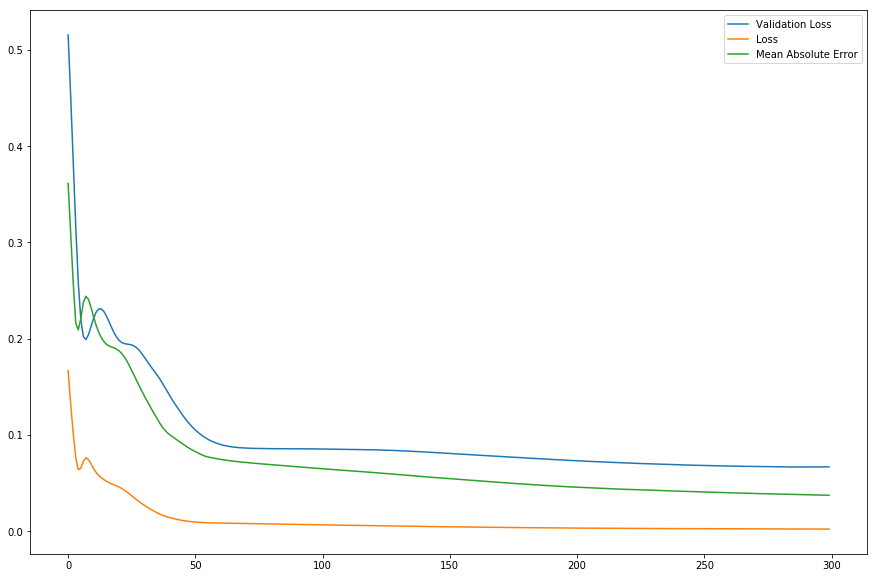

In [1539]:
history.history["val_loss"]
epochs = range(len(history.history["val_loss"]))

plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.plot(epochs, history.history["loss"], label = "Loss")
plt.plot(epochs, history.history["mean_absolute_error"], label = "Mean Absolute Error")
plt.legend()

In [1540]:
predictions = smodel.predict(x_test)

In [1541]:
predictions.shape

(21, 1)

In [1542]:
x_test = x_test.reshape(x_test.shape).reshape(-1, x_test.shape[2])

In [1543]:
sw_pred = pd.DataFrame()
sw_pred = pd.concat([pd.DataFrame( predictions, columns = ["Pred"]), pd.DataFrame(x_test[:,:][0:])], axis = 1)
#fw_pred["Pred"] = predictions
sw_pred

,Pred,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,0.670774,0.511223,0.517016,0.481145,0.452716,0.365902,0.244294,0.445195,0.381054,0.467876,...,0.499088,0.368929,0.269472,0.310958,0.510842,0.350950,0.372925,0.449050,0.512044,0.251493
1,0.614274,0.517016,0.481145,0.452716,0.365902,0.260824,0.445195,0.381054,0.467876,0.549662,...,0.368929,0.269472,0.310958,0.510842,0.350950,0.372925,0.449050,0.512044,0.251493,0.206168
2,0.579085,0.481145,0.452716,0.365902,0.260824,0.457330,0.381054,0.467876,0.549662,0.474863,...,0.269472,0.310958,0.510842,0.350950,0.372925,0.449050,0.512044,0.251493,0.206168,0.302948
3,0.579418,0.452716,0.365902,0.260824,0.457330,0.394592,0.467876,0.549662,0.474863,0.277438,...,0.310958,0.510842,0.350950,0.372925,0.449050,0.512044,0.251493,0.206168,0.302948,0.426571
4,0.550945,0.365902,0.260824,0.457330,0.394592,0.479515,0.549662,0.474863,0.277438,0.135270,...,0.510842,0.350950,0.372925,0.449050,0.512044,0.251493,0.206168,0.302948,0.426571,0.461268
5,0.531675,0.260824,0.457330,0.394592,0.479515,0.559512,0.474863,0.277438,0.135270,0.085670,...,0.350950,0.372925,0.449050,0.512044,0.251493,0.206168,0.302948,0.426571,0.461268,0.521722
6,0.539369,0.457330,0.394592,0.479515,0.559512,0.486349,0.277438,0.135270,0.085670,0.259013,...,0.372925,0.449050,0.512044,0.251493,0.206168,0.302948,0.426571,0.461268,0.521722,0.503666
7,0.511400,0.394592,0.479515,0.559512,0.486349,0.293242,0.135270,0.085670,0.259013,0.340976,...,0.449050,0.512044,0.251493,0.206168,0.302948,0.426571,0.461268,0.521722,0.503666,0.255974
8,0.481935,0.479515,0.559512,0.486349,0.293242,0.154184,0.085670,0.259013,0.340976,0.494086,...,0.512044,0.251493,0.206168,0.302948,0.426571,0.461268,0.521722,0.503666,0.255974,0.317843
9,0.439002,0.559512,0.486349,0.293242,0.154184,0.105668,0.259013,0.340976,0.494086,0.387172,...,0.251493,0.206168,0.302948,0.426571,0.461268,0.521722,0.503666,0.255974,0.317843,0.320617


In [1544]:
rev_trans = scaler.inverse_transform(sw_pred)

rev_trans

array([[ 3390.30368823, 46902.        , 47236.        , 45168.        ,
        43529.        , 38524.        , 32466.        , 43795.        ,
        40178.        , 45074.        , 49686.        , 45468.        ,
        34335.        , 26318.        , 23521.        , 33296.        ,
        37918.        , 46552.        , 40523.        , 35477.        ,
        34494.        , 34794.        , 42163.        , 44228.        ,
        49254.        , 42543.        , 37415.        , 39554.        ,
        49860.        , 41616.        , 42749.        , 46674.        ,
        49922.        , 36488.        ],
       [ 3357.60490308, 47236.        , 45168.        , 43529.        ,
        38524.        , 32466.        , 43795.        , 40178.        ,
        45074.        , 49686.        , 45468.        , 34335.        ,
        26318.        , 23521.        , 33296.        , 37918.        ,
        46552.        , 40523.        , 35477.        , 34494.        ,
        34794.        ,

In [1545]:
df_final = fw_df[predictions.shape[0]*-1:]
df_final.count()

Close                      21
new_case                   21
Shifted by 1 Days Back     21
Shifted by 2 Days Back     21
Shifted by 3 Days Back     21
Shifted by 4 Days Back     21
Shifted by 5 Days Back     21
Shifted by 6 Days Back     21
Shifted by 7 Days Back     21
Shifted by 8 Days Back     21
Shifted by 9 Days Back     21
Shifted by 10 Days Back    21
Shifted by 11 Days Back    21
Shifted by 12 Days Back    21
Shifted by 13 Days Back    21
Shifted by 14 Days Back    21
Shifted by 15 Days Back    21
Shifted by 16 Days Back    21
Shifted by 17 Days Back    21
Shifted by 18 Days Back    21
Shifted by 19 Days Back    21
Shifted by 20 Days Back    21
Shifted by 21 Days Back    21
Shifted by 22 Days Back    21
Shifted by 23 Days Back    21
Shifted by 24 Days Back    21
Shifted by 25 Days Back    21
Shifted by 26 Days Back    21
dtype: int64

In [1546]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


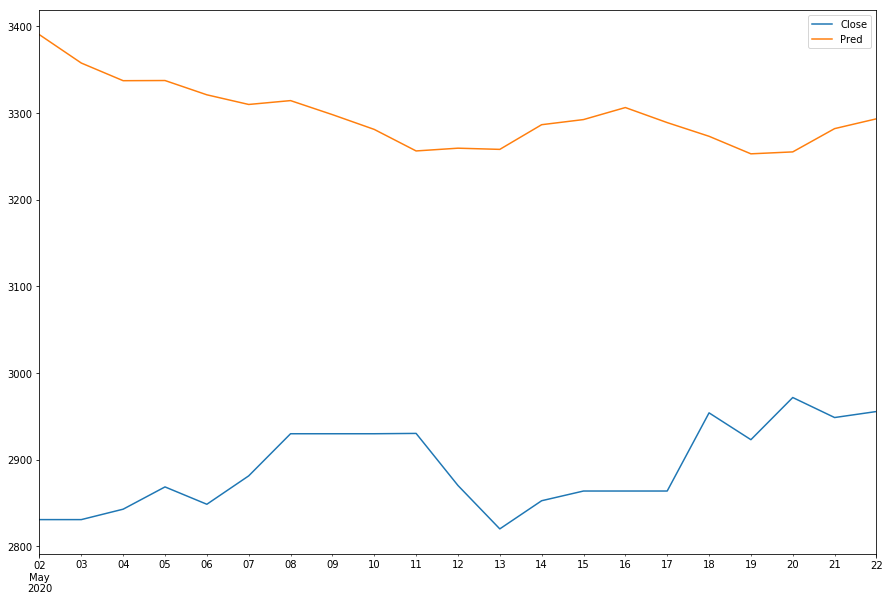

In [1547]:
df_final[["Close","Pred"]].plot()

# Third Wave

## Pearson R

In [1524]:
tw_df = cor_df.loc["2020-09-22":]
cols = tw_df.columns
tw_df = tw_df.drop(columns = cols[15:]).dropna()
tw_df

,Open,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,Shifted by 9 Days Back,Shifted by 10 Days Back,Shifted by 11 Days Back,Shifted by 12 Days Back
2020-09-22,3295.750000,3315.570068,49860,41616.0,42749.0,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0
2020-09-23,3320.110107,3236.919922,41616,42749.0,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0
2020-09-24,3226.139893,3246.590088,42749,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0
2020-09-25,3236.659912,3298.459961,46674,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0
2020-09-26,3236.659912,3298.459961,49922,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0
2020-09-27,3236.659912,3298.459961,36488,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0
2020-09-28,3333.899902,3351.600098,34151,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0
2020-09-29,3350.919922,3335.469971,39141,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0
2020-09-30,3341.209961,3363.000000,45515,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0,46893.0
2020-10-01,3385.870117,3380.800049,47304,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0,46893.0,47791.0


In [1525]:
twpearson_df = tw_df.corr()
twpearson_df[["Close"]]

,Close
Open,0.930974
Close,1.000000
new_case,0.541511
Shifted by 1 Days Back,0.551363
Shifted by 2 Days Back,0.569327
Shifted by 3 Days Back,0.572687
Shifted by 4 Days Back,0.638105
Shifted by 5 Days Back,0.647836
Shifted by 6 Days Back,0.647037
Shifted by 7 Days Back,0.643552


In [1526]:
twres_df = ""
twres_df = pd.DataFrame(columns = ["RMSE", "R Squared"])
RMSE = []
r2 = []

tscaled_df = scaler.fit_transform(tw_df)
tscaled_df = pd.DataFrame(tscaled_df)
loop = tscaled_df.columns
loop = loop.drop(loop[[0,1,2]])

for i in loop:
    target = 1
    predictors = [2, i]
    
    x = tscaled_df[predictors].values
    y = tscaled_df[target].values
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 30, shuffle = True)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    pred_test_lr = lr.predict(x_test)
    
    RMSE.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))
    r2.append(r2_score(y_test, pred_test_lr))

twres_df["RMSE"] = RMSE
twres_df["R Squared"] = r2

twres_df


/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,RMSE,R Squared
0,0.225824,-0.431806
1,0.203703,-0.165032
2,0.196427,-0.083294
3,0.176482,0.125529
4,0.132152,0.509671
5,0.131083,0.517570
6,0.241187,-0.633245
7,0.247427,-0.718842
8,0.182969,0.060062
9,0.144169,0.416437


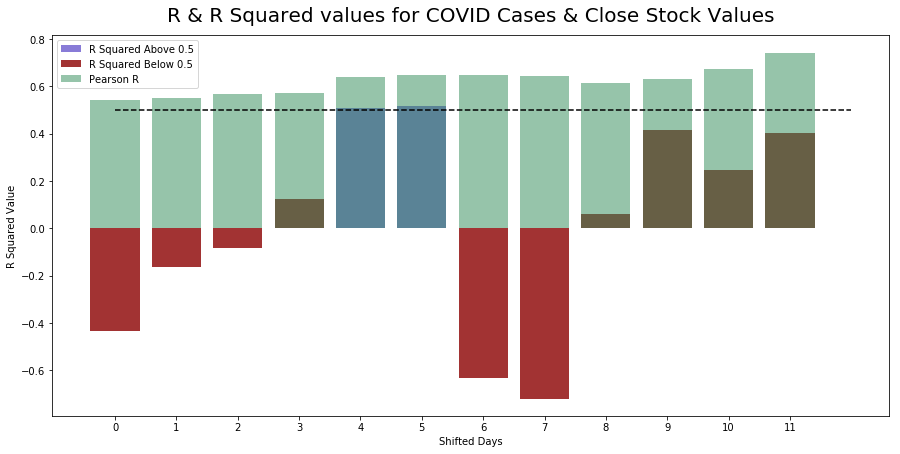

In [1527]:
threshold = 0.5
r2 = twres_df["R Squared"]

r = twpearson_df["Close"]

#r = r.reset_index()
#r = r.drop(columns =['index'])
r = r.drop(labels = ['Open','Close', "Shifted by 12 Days Back"])
#r_cases = correlation_df["COVID Cases"]
#r_cases = r_cases.drop(labels=['Exits', 'Average Entries', 'COVID Cases', 'COVID Deaths'])

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize=(15,7))

s = list(range(0, 12))

above_threshold = np.maximum(r2, threshold)
above_threshold = above_threshold.replace( threshold, 0)
below_threshold = np.minimum(r2, threshold)
below_threshold = below_threshold.replace( threshold, 0)

ax.bar(s,above_threshold, alpha = 0.8, color = "slateblue", label = "R Squared Above 0.5")
ax.bar(s,below_threshold, alpha = 0.8, color = "darkred", label = "R Squared Below 0.5")
ax.bar(s, r, alpha = 0.5, color = "seagreen", label = "Pearson R")

ax.plot([0,12],[threshold,threshold], "k--" )


plt.title("R & R Squared values for COVID Cases & Close Stock Values", y = 1.02, fontsize = 20)
plt.xlabel("Shifted Days", y = 1.02)
plt.ylabel("R Squared Value")
plt.xticks(range(0, 12));
plt.legend()

## LSTM Model on Third Wave

In [1483]:
cols = tw_df.columns

tw_df = tw_df.drop(columns = cols[0])
tw_df

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,Shifted by 9 Days Back,Shifted by 10 Days Back,Shifted by 11 Days Back,Shifted by 12 Days Back
2020-09-22,3315.570068,49860,41616.0,42749.0,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0
2020-09-23,3236.919922,41616,42749.0,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0
2020-09-24,3246.590088,42749,46674.0,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0
2020-09-25,3298.459961,46674,49922.0,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0
2020-09-26,3298.459961,49922,36488.0,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0
2020-09-27,3298.459961,36488,34151.0,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0
2020-09-28,3351.600098,34151,39141.0,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0
2020-09-29,3335.469971,39141,45515.0,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0
2020-09-30,3363.000000,45515,47304.0,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0,46893.0
2020-10-01,3380.800049,47304,50421.0,49490.0,36719.0,39909.0,40052.0,53348.0,55384.0,58677.0,53660.0,45949.0,46893.0,47791.0


In [1484]:
tw_df.describe()

,Close,new_case,Shifted by 1 Days Back,Shifted by 2 Days Back,Shifted by 3 Days Back,Shifted by 4 Days Back,Shifted by 5 Days Back,Shifted by 6 Days Back,Shifted by 7 Days Back,Shifted by 8 Days Back,Shifted by 9 Days Back,Shifted by 10 Days Back,Shifted by 11 Days Back,Shifted by 12 Days Back
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3460.511841,94324.885714,96161.100000,98369.828571,100890.371429,103282.157143,105526.014286,107496.000000,109668.342857,112209.842857,114865.285714,117092.785714,119858.357143,122198.571429
std,116.030610,49305.280394,50013.675927,50974.688160,52523.189120,53814.715165,54822.719386,54783.571215,54847.931325,55648.496207,56841.968267,57210.004868,58602.525106,59021.104999
min,3236.919922,34151.000000,34151.000000,34151.000000,34151.000000,34151.000000,34151.000000,34151.000000,36719.000000,36719.000000,36719.000000,36719.000000,36719.000000,36719.000000
25%,3361.477478,50046.750000,51152.750000,53413.500000,53622.500000,54091.000000,56207.250000,59067.250000,60289.250000,60531.750000,61409.250000,63359.750000,63768.750000,63953.000000
50%,3477.139893,78623.500000,83080.500000,83752.000000,85283.000000,87708.000000,88905.000000,89763.000000,92344.000000,97170.500000,102735.500000,106370.500000,112964.500000,120968.500000
75%,3557.540039,143833.250000,146184.750000,147608.250000,150851.250000,151980.250000,152461.500000,155780.500000,157357.750000,158055.250000,162844.000000,164910.750000,165233.250000,170619.000000
max,3638.350098,192673.000000,192673.000000,196227.000000,219187.000000,219187.000000,219187.000000,219187.000000,219187.000000,219187.000000,231396.000000,231396.000000,244011.000000,244011.000000


In [1485]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(tw_df)

data_scaled.shape

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(70, 14)

In [1486]:
features = data_scaled[:,1:]
target = data_scaled[:, 0]

features

array([[0.09909666, 0.04709126, 0.05304919, 0.06767872, 0.08523206,
        0.01262997, 0.        , 0.01327356, 0.04820571, 0.05437211,
        0.07038325, 0.06160875, 0.        ],
       [0.04709126, 0.05423853, 0.07726622, 0.08523206, 0.01262997,
        0.        , 0.02696773, 0.04820571, 0.05801017, 0.07038325,
        0.06560097, 0.        , 0.01538892],
       [0.05423853, 0.0789985 , 0.0973062 , 0.01262997, 0.        ,
        0.02696773, 0.06141508, 0.05801017, 0.07509262, 0.06560097,
        0.        , 0.01538892, 0.01607877],
       [0.0789985 , 0.09948777, 0.01441916, 0.        , 0.02696773,
        0.06141508, 0.07108346, 0.07509262, 0.06999035, 0.        ,
        0.01638612, 0.01607877, 0.08022017],
       [0.09948777, 0.01474243, 0.        , 0.02696773, 0.06141508,
        0.07108346, 0.08792884, 0.06999035, 0.        , 0.01638612,
        0.01712067, 0.08022017, 0.09004207],
       [0.01474243, 0.        , 0.03078803, 0.06141508, 0.07108346,
        0.08792884, 0.08289

### Splitting into Train(80%) & Test(20%) Data

In [1503]:
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size = 0.2, shuffle = False)

# Reshape x-train and x_test so it can be used by LSTM

x_train = x_train.reshape(len(x_train), 1, x_train.shape[1])
x_test = x_test.reshape(len(x_test), 1, x_test.shape[1]);
x_test.shape

(14, 1, 13)

### LSTM Architecture

In [1504]:
tmodel = tf.keras.Sequential()
tmodel.add(tf.keras.layers.LSTM(128, input_shape = (1, 13), return_sequences = True))
tmodel.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
tmodel.add(tf.keras.layers.LSTM(64, return_sequences = False))
tmodel.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [1505]:
tmodel.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_197 (LSTM)              (None, 1, 128)            72704     
_________________________________________________________________
leaky_re_lu_101 (LeakyReLU)  (None, 1, 128)            0         
_________________________________________________________________
lstm_198 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 65        
Total params: 122,177
Trainable params: 122,177
Non-trainable params: 0
_________________________________________________________________


In [1508]:
tmodel.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["mean_absolute_error"])

history = tmodel.fit(x_train, y_train, epochs = 300, validation_data = (x_test, y_test), shuffle = False, verbose = 1)

Epoch 1/300
2/2 [==============================] - 1s 262ms/step - loss: 0.2810 - mean_absolute_error: 0.4681 - val_loss: 0.7996 - val_mean_absolute_error: 0.8905
Epoch 2/300
2/2 [==============================] - 0s 16ms/step - loss: 0.2622 - mean_absolute_error: 0.4502 - val_loss: 0.7394 - val_mean_absolute_error: 0.8562
Epoch 3/300
2/2 [==============================] - 0s 11ms/step - loss: 0.2441 - mean_absolute_error: 0.4323 - val_loss: 0.6787 - val_mean_absolute_error: 0.8202
Epoch 4/300
2/2 [==============================] - 0s 17ms/step - loss: 0.2260 - mean_absolute_error: 0.4138 - val_loss: 0.6165 - val_mean_absolute_error: 0.7815
Epoch 5/300
2/2 [==============================] - 0s 16ms/step - loss: 0.2077 - mean_absolute_error: 0.3959 - val_loss: 0.5519 - val_mean_absolute_error: 0.7391
Epoch 6/300
2/2 [==============================] - 0s 13ms/step - loss: 0.1889 - mean_absolute_error: 0.3785 - val_loss: 0.4842 - val_mean_absolute_error: 0.6921
Epoch 7/300
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0394 - mean_absolute_error: 0.1585 - val_loss: 0.0208 - val_mean_absolute_error: 0.1242
Epoch 102/300
2/2 [==============================] - 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.1584 - val_loss: 0.0209 - val_mean_absolute_error: 0.1241
Epoch 103/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0391 - mean_absolute_error: 0.1582 - val_loss: 0.0209 - val_mean_absolute_error: 0.1238
Epoch 104/300
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.1580 - val_loss: 0.0210 - val_mean_absolute_error: 0.1234
Epoch 105/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0389 - mean_absolute_error: 0.1578 - val_loss: 0.0210 - val_mean_absolute_error: 0.1230
Epoch 106/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0388 - mean_absolute_error: 0.1576 - val_loss: 0.0211 - val_mean_absolute_error: 0.1227
Epoch 107/300
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.0327 - mean_absolute_error: 0.1479 - val_loss: 0.0487 - val_mean_absolute_error: 0.1992
Epoch 152/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0326 - mean_absolute_error: 0.1479 - val_loss: 0.0496 - val_mean_absolute_error: 0.2014
Epoch 153/300
2/2 [==============================] - 0s 12ms/step - loss: 0.0325 - mean_absolute_error: 0.1480 - val_loss: 0.0507 - val_mean_absolute_error: 0.2038
Epoch 154/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0324 - mean_absolute_error: 0.1482 - val_loss: 0.0517 - val_mean_absolute_error: 0.2061
Epoch 155/300
2/2 [==============================] - 0s 9ms/step - loss: 0.0324 - mean_absolute_error: 0.1483 - val_loss: 0.0528 - val_mean_absolute_error: 0.2084
Epoch 156/300
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - mean_absolute_error: 0.1484 - val_loss: 0.0540 - val_mean_absolute_error: 0.2109
Epoch 157/300
2/2 [============

2/2 [==============================] - 0s 11ms/step - loss: 0.0307 - mean_absolute_error: 0.1472 - val_loss: 0.0732 - val_mean_absolute_error: 0.2442
Epoch 202/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0306 - mean_absolute_error: 0.1472 - val_loss: 0.0735 - val_mean_absolute_error: 0.2446
Epoch 203/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0306 - mean_absolute_error: 0.1471 - val_loss: 0.0739 - val_mean_absolute_error: 0.2451
Epoch 204/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0306 - mean_absolute_error: 0.1471 - val_loss: 0.0743 - val_mean_absolute_error: 0.2456
Epoch 205/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0305 - mean_absolute_error: 0.1471 - val_loss: 0.0747 - val_mean_absolute_error: 0.2462
Epoch 206/300
2/2 [==============================] - 0s 12ms/step - loss: 0.0305 - mean_absolute_error: 0.1470 - val_loss: 0.0749 - val_mean_absolute_error: 0.2465
Epoch 207/300
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.0291 - mean_absolute_error: 0.1434 - val_loss: 0.0821 - val_mean_absolute_error: 0.2539
Epoch 252/300
2/2 [==============================] - 0s 12ms/step - loss: 0.0290 - mean_absolute_error: 0.1433 - val_loss: 0.0821 - val_mean_absolute_error: 0.2538
Epoch 253/300
2/2 [==============================] - 0s 9ms/step - loss: 0.0290 - mean_absolute_error: 0.1432 - val_loss: 0.0819 - val_mean_absolute_error: 0.2535
Epoch 254/300
2/2 [==============================] - 0s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.1430 - val_loss: 0.0819 - val_mean_absolute_error: 0.2533
Epoch 255/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0289 - mean_absolute_error: 0.1429 - val_loss: 0.0823 - val_mean_absolute_error: 0.2538
Epoch 256/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0289 - mean_absolute_error: 0.1429 - val_loss: 0.0828 - val_mean_absolute_error: 0.2543
Epoch 257/300
2/2 [============

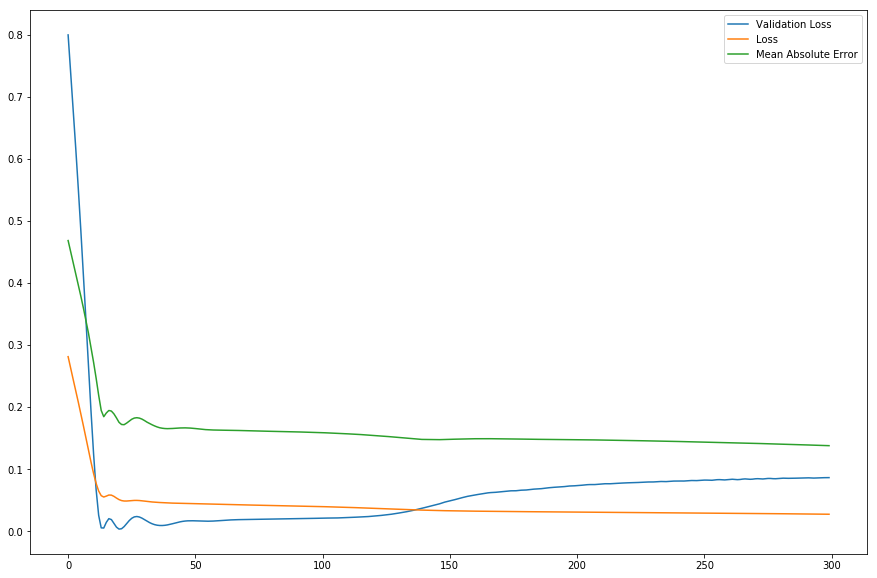

In [1509]:
epochs = range(len(history.history["val_loss"]))

plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.plot(epochs, history.history["loss"], label = "Loss")
plt.plot(epochs, history.history["mean_absolute_error"], label = "Mean Absolute Error")
plt.legend()

In [1511]:
predictions = tmodel.predict(x_test)

In [1513]:
x_test = x_test.reshape(x_test.shape).reshape(-1, x_test.shape[2])

In [1514]:
tw_pred = pd.DataFrame()
tw_pred = pd.concat([pd.DataFrame( predictions, columns = ["Pred"]), pd.DataFrame(x_test[:,:][0:])], axis = 1)
#fw_pred["Pred"] = predictions
tw_pred

,Pred,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.083530,0.821533,0.825980,0.931316,0.856709,0.813031,0.614416,0.666789,0.704578,0.794112,0.566035,0.696944,0.514318,0.559062
1,0.991613,0.825980,0.952196,0.978072,0.813031,0.614416,0.666789,0.708678,0.794112,0.603909,0.696944,0.547646,0.559062,0.556235
2,0.935529,0.952196,1.000000,0.928207,0.614416,0.666789,0.708678,0.796969,0.603909,0.743577,0.547646,0.595289,0.556235,0.683461
3,0.785443,1.000000,0.949017,0.701455,0.666789,0.708678,0.796969,0.609406,0.743577,0.584289,0.595289,0.592278,0.683461,0.769485
4,0.665291,0.949017,0.717181,0.761248,0.708678,0.796969,0.609406,0.747136,0.584289,0.635120,0.592278,0.727749,0.769485,0.880246
5,0.429462,0.717181,0.778315,0.809071,0.796969,0.609406,0.747136,0.590058,0.635120,0.631908,0.727749,0.819347,0.880246,0.855701
6,0.443741,0.778315,0.827210,0.909869,0.609406,0.747136,0.590058,0.640184,0.631908,0.776443,0.819347,0.937286,0.855701,0.821416
7,0.475289,0.827210,0.930268,0.695735,0.747136,0.590058,0.640184,0.637017,0.776443,0.874170,0.937286,0.911150,0.821416,0.664126
8,0.573016,0.930268,0.711333,0.852976,0.590058,0.640184,0.637017,0.779546,0.874170,1.000000,0.911150,0.874644,0.664126,0.721186
9,0.575698,0.711333,0.872100,0.673647,0.640184,0.637017,0.779546,0.875916,1.000000,0.972116,0.874644,0.707161,0.721186,0.869918


In [1515]:
rev_trans = scaler.inverse_transform(tw_pred)
rev_trans

array([[  3671.88158806, 164382.        , 165087.        ,
        185095.        , 192673.        , 184591.        ,
        147840.        , 157531.        , 165282.        ,
        181619.        , 146913.        , 172398.        ,
        143333.        , 152608.        ],
       [  3634.98341104, 165087.        , 185095.        ,
        192673.        , 184591.        , 147840.        ,
        157531.        , 165282.        , 181619.        ,
        146913.        , 172398.        , 143333.        ,
        152608.        , 152022.        ],
       [  3612.46937092, 185095.        , 192673.        ,
        184591.        , 147840.        , 157531.        ,
        165282.        , 181619.        , 146913.        ,
        172398.        , 143333.        , 152608.        ,
        152022.        , 178395.        ],
       [  3552.22061441, 192673.        , 184591.        ,
        147840.        , 157531.        , 165282.        ,
        181619.        , 146913.        , 172

In [1516]:
df_final = tw_df[predictions.shape[0]*-1:]
df_final.count()

Close                      14
new_case                   14
Shifted by 1 Days Back     14
Shifted by 2 Days Back     14
Shifted by 3 Days Back     14
Shifted by 4 Days Back     14
Shifted by 5 Days Back     14
Shifted by 6 Days Back     14
Shifted by 7 Days Back     14
Shifted by 8 Days Back     14
Shifted by 9 Days Back     14
Shifted by 10 Days Back    14
Shifted by 11 Days Back    14
Shifted by 12 Days Back    14
dtype: int64

In [1517]:
df_final["Pred"] = rev_trans[:,0]

/cm/shared/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


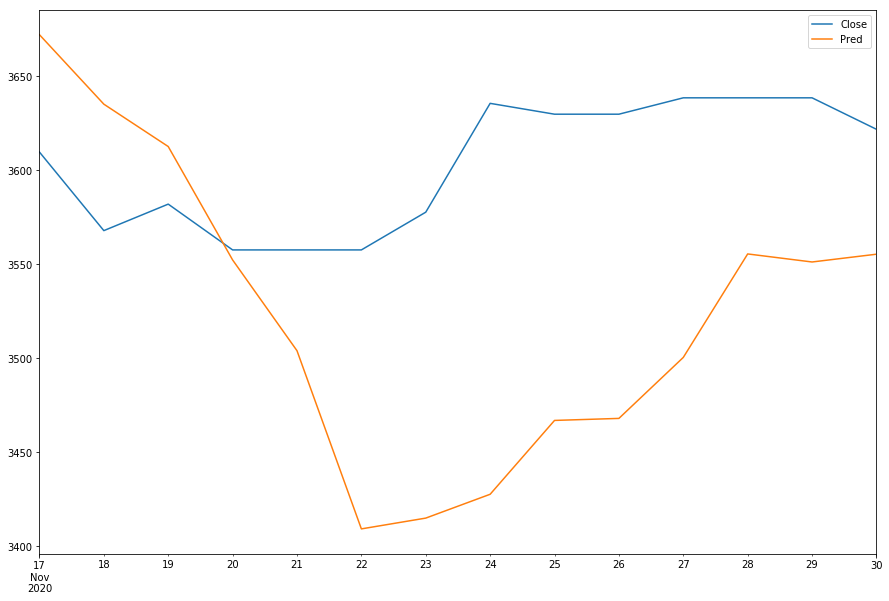

In [1518]:
df_final[["Close", "Pred"]].plot()